Book: Times Series Analysis for Everyone

Author: Bruno Gonçalves

Published by Pearson

https://learning.oreilly.com/videos/times-series-analysis

Github: https://github.com/DataForScience/Timeseries

# Chapter 1 - Pandas

In [1]:
!pip install watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import watermark

%load_ext watermark
%matplotlib inline

In [3]:
plt.style.use('seaborn-v0_8-muted')

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

Git hash: 

matplotlib: 3.7.1
pandas    : 2.0.3
numpy     : 1.25.2
watermark : 2.4.3



### Recap

In [ ]:
data = {'id': [1, 2, 3, 4, 5],
        'names': ['Ana', 'Karen', 'Bia', 'Joao', 'Pedro']}
series = pd.Series(data['names'])
series

0      Ana
1    Karen
2      Bia
3     Joao
4    Pedro
dtype: object

In [ ]:
df = pd.DataFrame(data)
df.columns=['Id', 'Name']
df = pd.concat([df, pd.DataFrame([{'Id': 6, 'Name': 'Lais'}])], ignore_index=True)
df.index = ['row1', 'row2', 'row3', 'row4', 'row5', 'row6']
df['Age'] = [15, 18, 17, 25, 30, 24]
df['Gender'] = [0, 0, 0, 1, 1, 0]

df

Id   Name  Age  Gender
row1   1    Ana   15       0
row2   2  Karen   18       0
row3   3    Bia   17       0
row4   4   Joao   25       1
row5   5  Pedro   30       1
row6   6   Lais   24       0

In [ ]:
# search by index names
df.loc[['row2','row3'], ['Name']] #df.loc[['b','c']].Names

Name
row2  Karen
row3    Bia

In [ ]:
# search by index position
df.iloc[1:3, [1]] # df.iloc[1:3].Names

Names
row2  Karen
row3    Bia

In [ ]:
# map works at element level and accepts functions and dicts.
# Series.map(arg, na_action=None) -> Series
# na_action  lets you decide what happens to NaN values
df['Age'] = df['Age'].map(lambda x: x+1)
df

Id   Name  Age
row1   1    Ana   18
row2   2  Karen   21
row3   3    Bia   20
row4   4   Joao   28
row5   5  Pedro   33
row6   6   Lais   27

In [ ]:
GENDER_ENCODING = {
    0: 'female',
    1: 'male'
}

df['GenderDescription'] = df['Gender'].map(GENDER_ENCODING)
df

Id   Name  Age  Gender GenderDescription
row1   1    Ana   15       0            female
row2   2  Karen   18       0            female
row3   3    Bia   17       0            female
row4   4   Joao   25       1              male
row5   5  Pedro   30       1              male
row6   6   Lais   24       0            female

In [ ]:
# apply accepts a function. It does not accept a dict. So to do the same as before is necessary to get first each element from the dict. Map is faster than apply for this.
df['GenderWithApply'] = df['Gender'].apply(lambda x:
    GENDER_ENCODING.get(x, np.nan)
)
df

Id   Name  Age  Gender GenderDescription GenderWithApply
row1   1    Ana   15       0            female          female
row2   2  Karen   18       0            female          female
row3   3    Bia   17       0            female          female
row4   4   Joao   25       1              male            male
row5   5  Pedro   30       1              male            male
row6   6   Lais   24       0            female          female

In [ ]:
# it is possible to perform aggregations, but it does not keep the indexes
df.groupby("Gender")["Age"] \
    .apply(
        lambda x: (x - x.mean()) / x.std()
    )

Gender      
0       row1   -0.903696
        row2   -0.129099
        row3   -0.387298
        row6    1.420094
1       row4   -0.707107
        row5    0.707107
Name: Age, dtype: float64

In [ ]:
df.groupby("Gender")["Age"] \
    .apply(
        'mean'
    )

Gender
0    18.5
1    27.5
Name: Age, dtype: float64

In [ ]:
df["Age"].apply('mean')

21.5

In [ ]:
# transform works at the column level. Takes one function that is expected to be applied to a column and return a column of equal size.
# Supports aggregations
# Retains input dataFrame indexes
# It return a dataframe with the same length along the axis it's applied on. It means that it assigns those aggregate values to each element.
df['Age'] = df['Age'].transform(lambda x: x+1)
df

Id   Name  Age
row1   1    Ana   17
row2   2  Karen   20
row3   3    Bia   19
row4   4   Joao   27
row5   5  Pedro   32
row6   6   Lais   26

In [ ]:
df.groupby("Gender")["Age"] \
    .transform(
        lambda x: (x - x.mean()) / x.std()
    )

row1   -0.903696
row2   -0.129099
row3   -0.387298
row4   -0.707107
row5    0.707107
row6    1.420094
Name: Age, dtype: float64

In [ ]:
df.groupby("Gender")["Age"] \
    .transform(
        'mean'
    )

row1    18.5
row2    18.5
row3    18.5
row4    27.5
row5    27.5
row6    18.5
Name: Age, dtype: float64

### Timeseries example
https://finance.yahoo.com/quote/AAPL/history

In [ ]:
df_yahoo = pd.read_csv('/content/AAPL.csv', parse_dates=['Date'])
# alternative: df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date']).astype('str')
df_yahoo.set_index('Date', inplace=True)
df_yahoo.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-14  164.589996  166.320007  163.820007  165.210007  164.332840   
2023-04-17  165.089996  165.389999  164.029999  165.229996  164.352737   
2023-04-18  166.100006  167.410004  165.649994  166.470001  165.586166   
2023-04-19  165.800003  168.160004  165.539993  167.630005  166.740005   
2023-04-20  166.089996  167.869995  165.559998  166.649994  165.765198   

              Volume  
Date                  
2023-04-14  49386500  
2023-04-17  41516200  
2023-04-18  49923000  
2023-04-19  47720200  
2023-04-20  52456400

In [ ]:
df_yahoo.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-08  169.029999  169.199997  168.240005  168.449997  168.449997   
2024-04-09  168.699997  170.080002  168.350006  169.669998  169.669998   
2024-04-10  168.800003  169.089996  167.110001  167.779999  167.779999   
2024-04-11  168.339996  175.460007  168.160004  175.039993  175.039993   
2024-04-12  174.259995  178.360001  174.210007  176.550003  176.550003   

               Volume  
Date                   
2024-04-08   37425500  
2024-04-09   42451200  
2024-04-10   49709300  
2024-04-11   91070300  
2024-04-12  101593300

In [ ]:
df_yahoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-04-14 to 2024-04-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
df_yahoo.loc['2023':'2023-05-01']

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-14  164.589996  166.320007  163.820007  165.210007  164.332840   
2023-04-17  165.089996  165.389999  164.029999  165.229996  164.352737   
2023-04-18  166.100006  167.410004  165.649994  166.470001  165.586166   
2023-04-19  165.800003  168.160004  165.539993  167.630005  166.740005   
2023-04-20  166.089996  167.869995  165.559998  166.649994  165.765198   
2023-04-21  165.050003  166.449997  164.490005  165.020004  164.143860   
2023-04-24  165.000000  165.600006  163.889999  165.330002  164.452209   
2023-04-25  165.190002  166.309998  163.729996  163.770004  162.900482   
2023-04-26  163.059998  165.279999  162.800003  163.759995  162.890533   
2023-04-27  165.190002  168.559998  165.190002  168.410004  167.515869   
2023-04-28  168.490005  169.850006  167.880005  169.679993  168.779099   
2023-05-01  169.279999  170.449997  168.639999  169.589996  168.689606   

              Volume  
Date                  
2023-04-14  49386500  
2023-04-17  41516200  
2023-04-18  49923000  
2023-04-19  47720200  
2023-04-20  52456400  
2023-04-21  58337300  
2023-04-24  41949600  
2023-04-25  48714100  
2023-04-26  45498800  
2023-04-27  64902300  
2023-04-28  55209200  
2023-05-01  52472900

In [ ]:
df_yahoo['Year'] = df_yahoo.index.year
df_yahoo['Month'] = df_yahoo.index.month
df_yahoo

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-14  164.589996  166.320007  163.820007  165.210007  164.332840   
2023-04-17  165.089996  165.389999  164.029999  165.229996  164.352737   
2023-04-18  166.100006  167.410004  165.649994  166.470001  165.586166   
2023-04-19  165.800003  168.160004  165.539993  167.630005  166.740005   
2023-04-20  166.089996  167.869995  165.559998  166.649994  165.765198   
...                ...         ...         ...         ...         ...   
2024-04-08  169.029999  169.199997  168.240005  168.449997  168.449997   
2024-04-09  168.699997  170.080002  168.350006  169.669998  169.669998   
2024-04-10  168.800003  169.089996  167.110001  167.779999  167.779999   
2024-04-11  168.339996  175.460007  168.160004  175.039993  175.039993   
2024-04-12  174.259995  178.360001  174.210007  176.550003  176.550003   

               Volume  Year  Month  
Date                                
2023-04-14   49386500  2023      4  
2023-04-17   41516200  2023      4  
2023-04-18   49923000  2023      4  
2023-04-19   47720200  2023      4  
2023-04-20   52456400  2023      4  
...               ...   ...    ...  
2024-04-08   37425500  2024      4  
2024-04-09   42451200  2024      4  
2024-04-10   49709300  2024      4  
2024-04-11   91070300  2024      4  
2024-04-12  101593300  2024      4  

[251 rows x 8 columns]

In [ ]:
df_yahoo[['Volume', 'Year']].groupby('Year').sum()

Volume
Year             
2023  10119043100
2024   4342900000

In [ ]:
df_yahoo_pivotted = pd.pivot_table(
    df_yahoo,
    index='Month',
    columns='Year',
    values='Open',
    aggfunc=np.mean
)
df_yahoo_pivotted

Year         2023        2024
Month                        
1             NaN  187.597142
2             NaN  184.668000
3             NaN  172.789000
4      165.422728  169.806998
5      172.510456         NaN
6      183.679048         NaN
7      192.506500         NaN
8      181.415219         NaN
9      177.586500         NaN
10     174.026364         NaN
11     185.280478         NaN
12     194.210000         NaN

<Axes: xlabel='Month'>

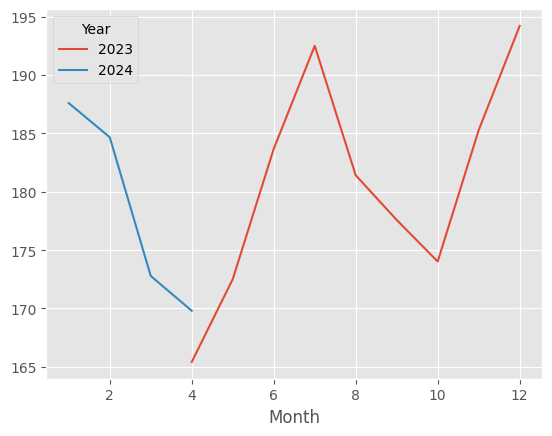

In [ ]:
df_yahoo_pivotted.plot()

# Chapter 2 - Timeseries Visualization

### GDP

Data: https://github.com/DataFhttps://github.com/DataForScience/Timeseries/blob/master/data/GDP.csv

In [24]:
gdp_df = pd.read_csv('/content/GDP.csv', parse_dates=['DATE'])
gdp_df.set_index(['DATE'], inplace=True)
gdp_df

GDP
DATE                 
1947-01-01   2033.061
1947-04-01   2027.639
1947-07-01   2023.452
1947-10-01   2055.103
1948-01-01   2086.017
...               ...
2018-04-01  18598.135
2018-07-01  18732.720
2018-10-01  18783.548
2019-01-01  18927.281
2019-04-01  19021.860

[290 rows x 1 columns]

In [ ]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 1947-01-01 to 2019-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     290 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


Text(0, 0.5, 'GDP ($\\$B$)')

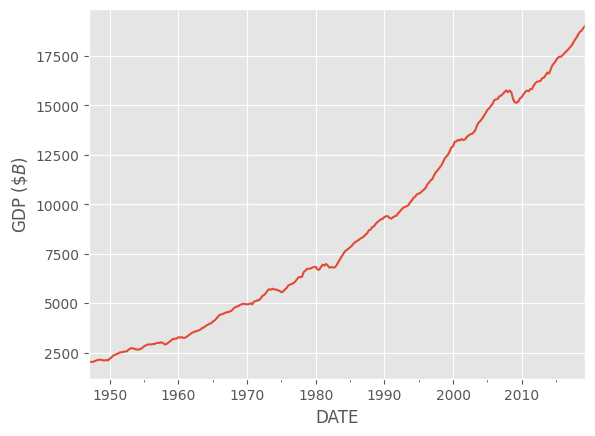

In [ ]:
ax = gdp_df.plot(legend=False)
ax.set_ylabel(r'GDP ($\$B$)')

### Influenza mortality

https://github.com/DataForScience/Timeseries/blob/master/data/CDC.csv

In [ ]:
cdc_df = pd.read_csv('/content/CDC.csv')
cdc_df

Year  Week  Percent of Deaths Due to Pneumonia and Influenza  Expected  \
0    2012     1                                          8.479120   8.15718   
1    2012     2                                          8.343472   8.22181   
2    2012     3                                          8.370908   8.27534   
3    2012     4                                          8.448458   8.31696   
4    2012     5                                          8.140332   8.34602   
..    ...   ...                                               ...       ...   
398  2019    34                                          5.085333   5.24916   
399  2019    35                                          5.031743   5.26200   
400  2019    36                                          4.951483   5.28715   
401  2019    37                                          4.781635   5.32427   
402  2019    38                                          4.985358   5.37284   

     Threshold  All Deaths  Pneumonia Deaths  Influenza Deaths  
0      8.49104       51102              4323                10  
1      8.55556       50962              4245                 7  
2      8.60898       51010              4261                 9  
3      8.65049       50163              4227                11  
4      8.67945       49568              4026                 9  
..         ...         ...               ...               ...  
398    5.58794       46172              2343                 5  
399    5.60078       44577              2231                12  
400    5.62593       43078              2122                11  
401    5.66305       38857              1845                13  
402    5.71162       28684              1421                 9  

[403 rows x 8 columns]

<Axes: >

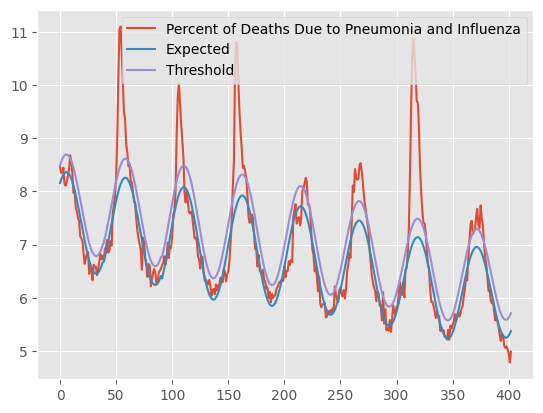

In [ ]:
cdc_df[['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold']].plot()

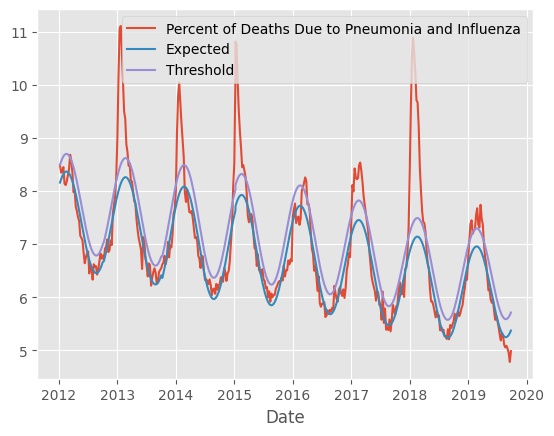

In [ ]:
cdc_df['Date'] = cdc_df['Year'] + cdc_df['Week'] /52 # 52 is the number of weeks of a year
ax = cdc_df.plot(x='Date', y=['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold'])
ax.legend = ['Mortality', 'Expected', 'Threshold']
ax.set_xlabel = 'Date'
ax.set_xlabel = 'Mortality'

In [ ]:
cdc_df.head()

Year  Week  Percent of Deaths Due to Pneumonia and Influenza  Expected  \
0  2012     1                                          8.479120   8.15718   
1  2012     2                                          8.343472   8.22181   
2  2012     3                                          8.370908   8.27534   
3  2012     4                                          8.448458   8.31696   
4  2012     5                                          8.140332   8.34602   

   Threshold  All Deaths  Pneumonia Deaths  Influenza Deaths         Date  
0    8.49104       51102              4323                10  2012.019231  
1    8.55556       50962              4245                 7  2012.038462  
2    8.60898       51010              4261                 9  2012.057692  
3    8.65049       50163              4227                11  2012.076923  
4    8.67945       49568              4026                 9  2012.096154

### Sun activity

https://github.com/DataForScience/Timeseries/blob/master/data/sun.csv

In [ ]:
sun_df = pd.read_csv('/content/sun.csv')
sun_df

YEAR  SUNACTIVITY
0    1700.0          5.0
1    1701.0         11.0
2    1702.0         16.0
3    1703.0         23.0
4    1704.0         36.0
..      ...          ...
304  2004.0         40.4
305  2005.0         29.8
306  2006.0         15.2
307  2007.0          7.5
308  2008.0          2.9

[309 rows x 2 columns]

Text(0, 0.5, 'Sun Spot Activity')

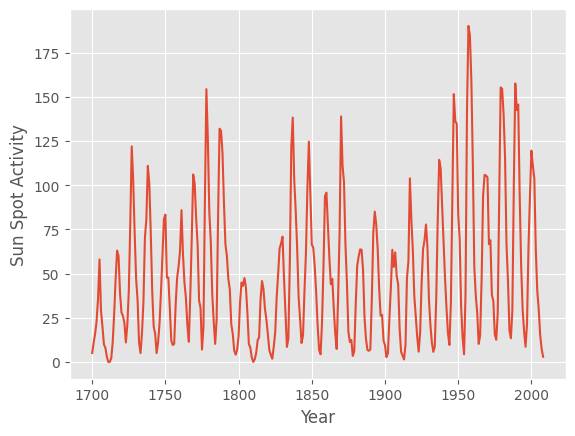

In [ ]:
ax = sun_df.plot(x='YEAR', y='SUNACTIVITY', legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('Sun Spot Activity')

### Stock Market

https://github.com/DataForScience/Timeseries/blob/master/data/DJIA.csv

In [ ]:
dj_df = pd.read_csv('/content/DJIA.csv',
                    parse_dates=['DATE'],
                    na_values='.'# replaces dots with nan
                    )
dj_df.set_index('DATE', inplace=True)
dj_df

DJIA
DATE                
2009-10-12   9885.80
2009-10-13   9871.06
2009-10-14  10015.86
2009-10-15  10062.94
2009-10-16   9995.91
...              ...
2019-10-04  26573.72
2019-10-07  26478.02
2019-10-08  26164.04
2019-10-09  26346.01
2019-10-10  26496.67

[2609 rows x 1 columns]

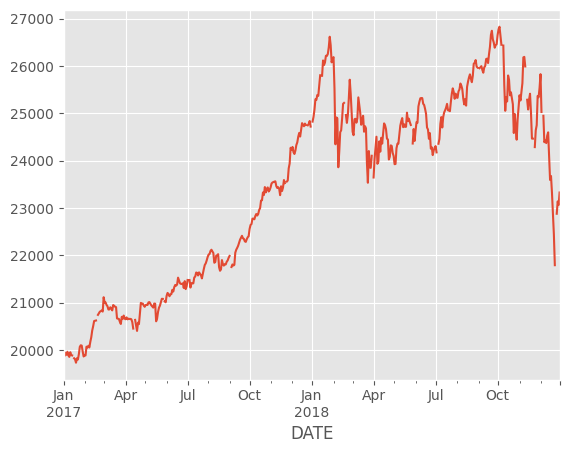

In [ ]:
ax = dj_df.loc['2017':'2018'].plot(legend=False)
ax.set_xlabel = 'Down Jones'
ax.set_ylabel = 'Date'

### Airline Passengers

https://github.com/DataForScience/Timeseries/blob/master/data/international-airline-passengers.csv

In [ ]:
df_air_pass = pd.read_csv('/content/international-airline-passengers.csv', sep=';', parse_dates=['Month'])
df_air_pass.set_index('Month', inplace=True)
df_air_pass

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

Text(0.5, 0, 'Date')

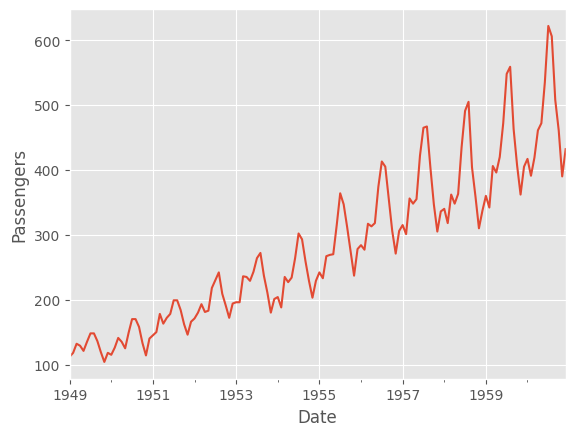

In [ ]:
ax = df_air_pass.plot(legend=False)
ax.set_ylabel('Passengers')
ax.set_xlabel('Date')

# Chapter 3 - Trend Behaviour

### Non-stationarity

In [ ]:
x =  np.linspace(0, np.pi*10, 360)
y = np.sin(x)

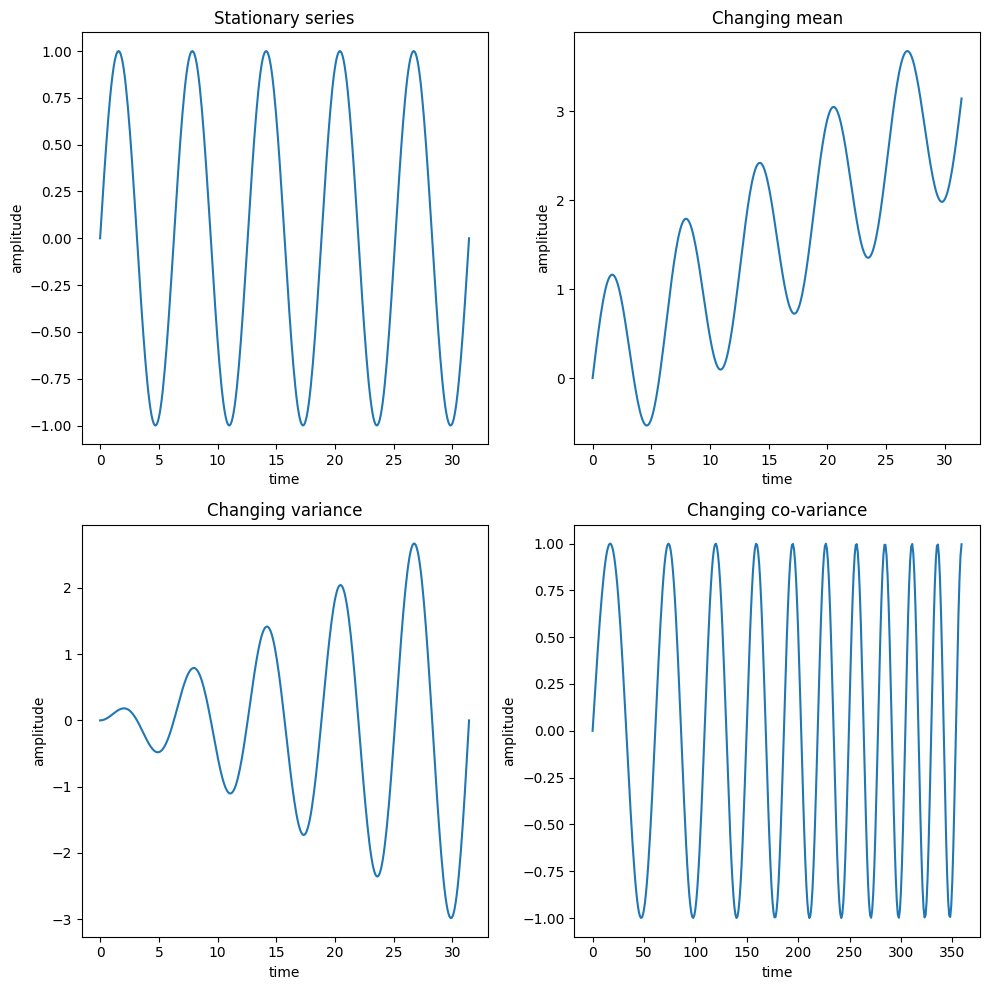

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0][0].plot(x,y)
axs[0][0].set_title('Stationary series')
axs[0][0].set_xlabel('time')
axs[0][0].set_ylabel('amplitude')

axs[0][1].plot(x,y+x/10)
axs[0][1].set_title('Changing mean')
axs[0][1].set_xlabel('time')
axs[0][1].set_ylabel('amplitude')

axs[1][0].plot(x,y*x/10)
axs[1][0].set_title('Changing variance')
axs[1][0].set_xlabel('time')
axs[1][0].set_ylabel('amplitude')

axs[1][1].plot(np.sin(x+x*x/30))
axs[1][1].set_title('Changing co-variance')
axs[1][1].set_xlabel('time')
axs[1][1].set_ylabel('amplitude')

plt.tight_layout()

#### Trends

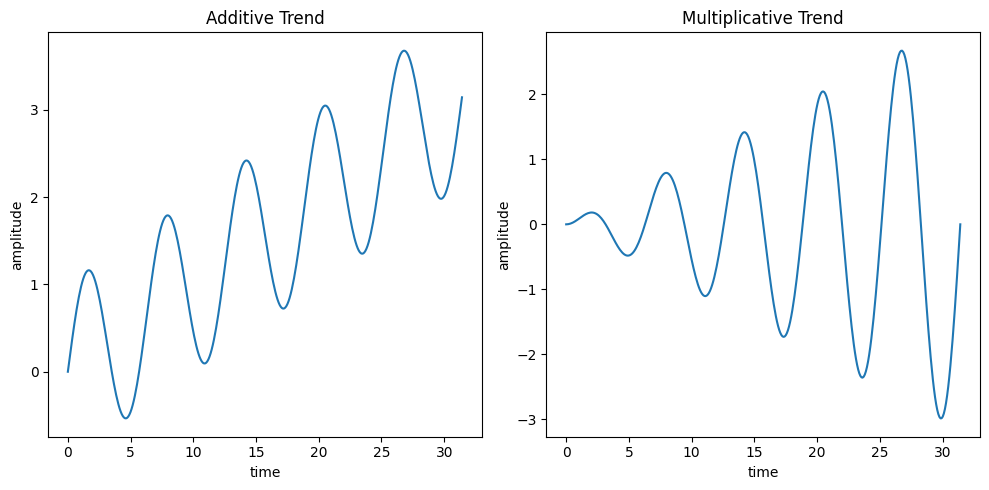

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(10,5), squeeze=False)

axis[0][0].plot(x,y+x/10)
axis[0][0].set_title('Additive Trend')
axis[0][0].set_xlabel('time')
axis[0][0].set_ylabel('amplitude')

# Amplitudes variation are increasing in time
axis[0][1].plot(x,y*x/10)
axis[0][1].set_title('Multiplicative Trend')
axis[0][1].set_xlabel('time')
axis[0][1].set_ylabel('amplitude')

plt.tight_layout()

Text(0.5, 0, 'Date')

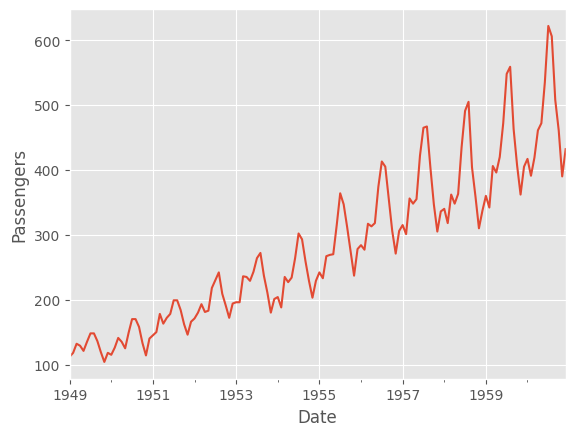

In [ ]:
#Example:

df_air_pass = pd.read_csv('/content/international-airline-passengers.csv', sep=';', parse_dates=['Month'])
df_air_pass.set_index('Month', inplace=True)
ax = df_air_pass.plot(legend=False)
ax.set_ylabel('Passengers')
ax.set_xlabel('Date')

Text(0, 0.5, '$\\langle Passengers\\rangle$')

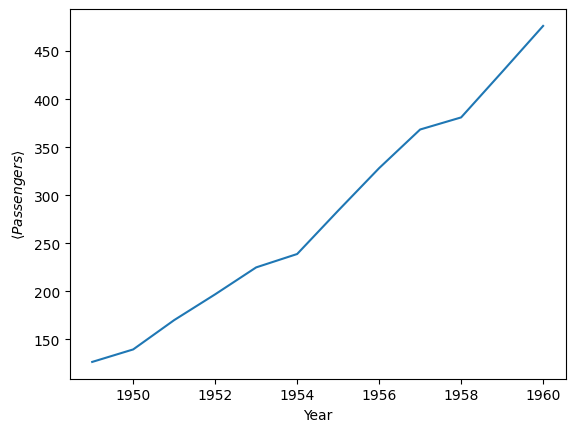

In [ ]:
# It indicates that there are a growing mean value (one of the kinds of non-stationary time series)

df_air_pass['Year'] = df_air_pass.index.year
ax=df_air_pass[['Year', 'Passengers']].groupby('Year').mean().plot(legend=False) # mean by year
ax.set_ylabel(r'$\langle Passengers\rangle$')

We can also calculate the range (max-min) of the values for each year and plot them as a s function of the year.

It shows clearlly that there is a multiplicative trend because we can se that the amplitude is changing (variance is increasing over time).

Passengers  Max  Min  Range
Year                             
1949  126.666667  148  104     44
1950  139.666667  170  114     56
1951  170.166667  199  145     54
1952  197.000000  242  171     71
1953  225.000000  272  180     92
1954  238.916667  302  188    114
1955  284.000000  364  233    131
1956  328.250000  413  271    142
1957  368.416667  467  301    166
1958  381.000000  505  310    195
1959  428.333333  559  342    217
1960  476.166667  622  390    232

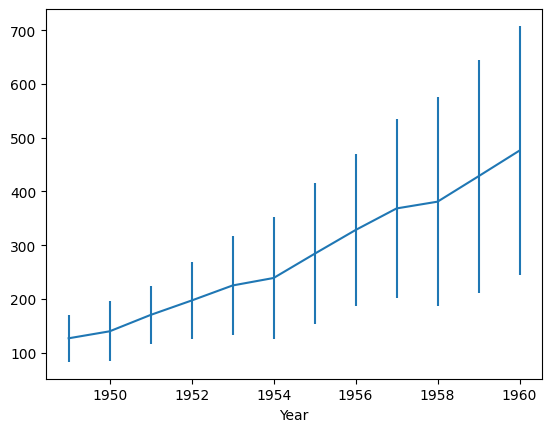

In [ ]:
stats = df_air_pass[['Year', 'Passengers']].groupby('Year').mean()
stats['Max'] = df_air_pass[['Year', 'Passengers']].groupby('Year').max()
stats['Min'] = df_air_pass[['Year', 'Passengers']].groupby('Year').min()
stats['Range'] = stats['Max'] - stats['Min']

ax = stats.plot(y='Passengers', yerr='Range', legend=False) # yerr: add error bars
ax.set_label('Passengers')

stats

#### Decompositon - Detrending

In [ ]:
def running_average(x, order):
	"""Runs over the entire dataset, one step a time, and calculates
	the average value within each window.
  :param DataFrame x: data
  :param int order: width of the window. For instance, 12 months"""

	index = x.index # months
	values = x.values # passangers counts

  # first window
	current = x.values[:order].sum() # values for the first window, going from 0 to order-1

	running = []

  # sliding the window
  # the window slides one month at time. When it slides, it replaces the first value of the window
  # with the next one (in order to do the make the window move) and take the average.
	for i in range(order, x.shape[0]):
		current += values[i] # add the next window value
		current -= values[i-order] # remove the first window value
		running.append(current/order) # average value of the new window

	run = x.iloc[order:].copy()
	run = np.array(running)

	final = x.copy()[order:]
	final.iloc[:, 0] = run

	return final

In [ ]:
trend = running_average(df_air_pass, 12)
trend

Passengers
Month                 
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
1950-04-01  128.833333
1950-05-01  129.166667
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[132 rows x 1 columns]

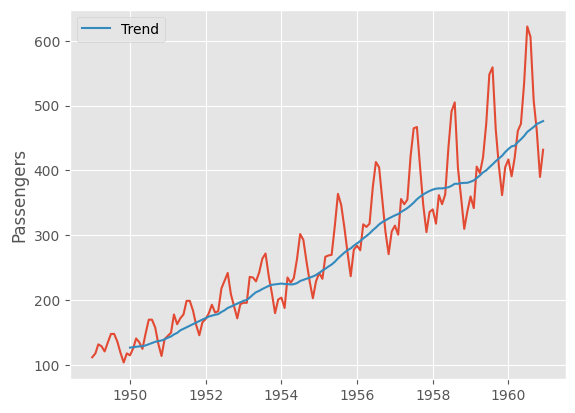

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(df_air_pass.index, df_air_pass['Passengers'])
ax.set_label('Date')
ax.set_ylabel('Passengers')
ax.plot(df_air_pass.index[12:], trend, label='Trend')
ax.legend()

It is possible to see a clearly increasing trend!

Below, we will remove the trend of the data:

In [ ]:
detrended = df_air_pass.iloc[12:].div(trend)

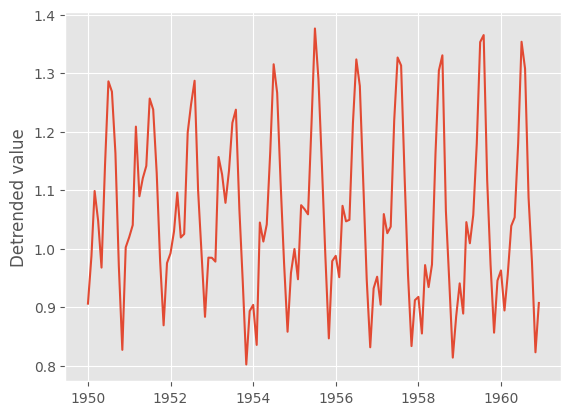

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_label('Date')
ax.set_ylabel('Detrended value')
ax.plot(df_air_pass.index[12:], detrended)

#### Decompositon - Seasonality

In [ ]:
def plot_seasons(detrended, order, plot_mean=True):
	colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
	N = len(detrended)
	data = np.array([detrended[i::order].values for i in range(order)])
	means = np.mean(data, axis=1)
	medians = np.median(data, axis=1)

	counts = [0]
	counts.extend([len(data[i]) for i in range(order)])
	counts = np.cumsum(counts)

	for i in range(order):
		values = data[i, :]
		npoints = len(values)

		plt.plot(range(counts[i], counts[i+1]), values, c=colors[0])
		plt.plot(range(counts[i], counts[i+1]), np.ones(npoints)*means[i], c=colors[1])
		plt.plot(range(counts[i], counts[i+1]), np.ones(npoints)*medians[i], c=colors[2])

	plt.legend(['data', 'mean', 'median'])
	plt.xlabel('season')
	plt.ylabel('values')


	if plot_mean:
		ticks = (counts[:-1]+counts[1]/2)
		plt.xticks(ticks, np.arange(order))
		plt.plot(ticks, means, c=colors[3])

	return means

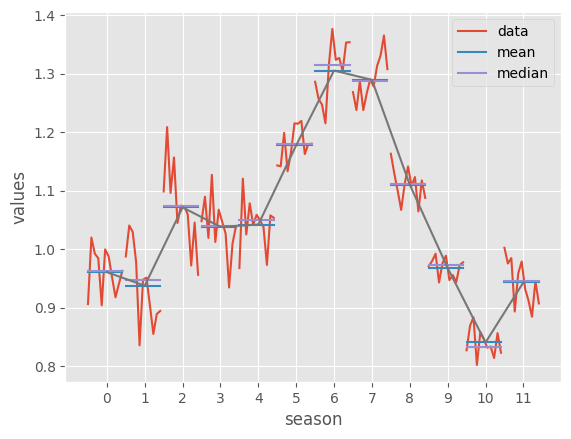

In [ ]:
# plot the seasonal pattern
means = plot_seasons(detrended, 12)

#### Decomposition - Trend, Seasonality and Residuals

In [ ]:
def decomposition(data, order):
	values = data.values.flatten()
	trend = running_average(data, order)
	detrended = data[order:].div(trend) # removes trend

	season = [detrended[i::order].mean() for i in range(order)]
	seasonality =  np.array(season*(detrended.shape[0]//order+1))[:detrended.shape[0]]
	residuals = data[order:].div(trend*seasonality) # removes trend and seasonality from the original data (multiplicative decomposition)
  # for additive decomposition, you should add and substract, instead of multiply and divide

	return values, trend, seasonality, residuals

In [ ]:
values, trend, seasonality, residuals = decomposition(df_air_pass, 12)

In [ ]:
def plot_decomposition(values, trend, seasonality, residuals):
	fig, axs = plt.subplots(4, 1, figsize=(10,10), sharex=True)
	index = df_air_pass.index
	axs[0].plot(index, values)
	axs[0].set_title('Original Data')

	axs[1].plot(index[12:], trend)
	axs[1].set_title('Trend')

	axs[2].plot(index[12:], detrended)
	axs[2].set_title('Seasonality')

	axs[3].plot(index[12:], residuals)
	axs[3].set_title('Residuals')

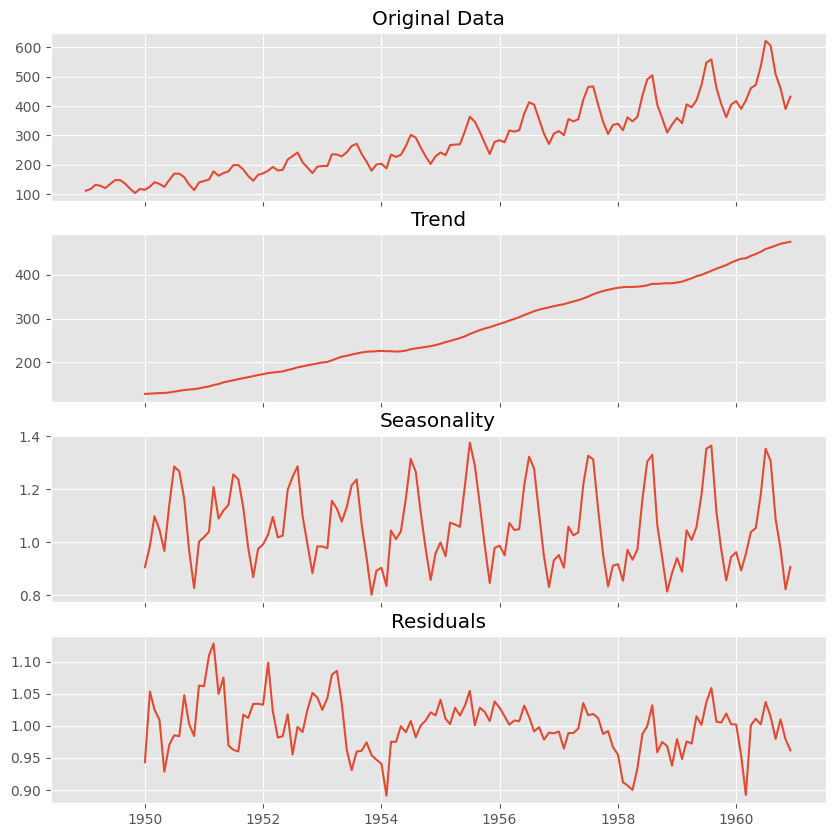

In [ ]:
plot_decomposition(values, trend, seasonality, residuals)

# Chapter 4 - Transforming time series data

In [ ]:
import scipy
from scipy import stats

In [ ]:
dj_df.head()

DJIA
DATE                
2009-10-12   9885.80
2009-10-13   9871.06
2009-10-14  10015.86
2009-10-15  10062.94
2009-10-16   9995.91

Text(0.5, 0, 'Date')

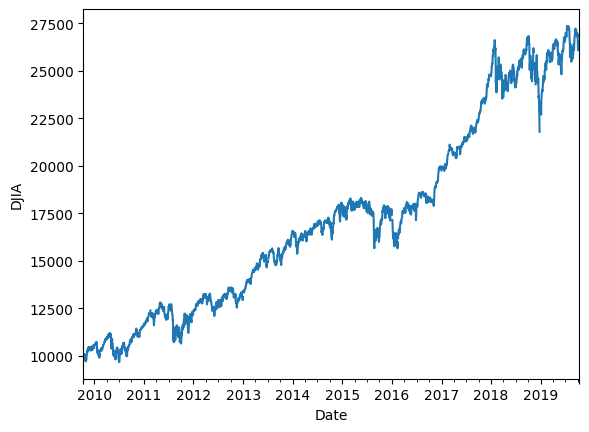

In [ ]:
dj_df.plot(legend=False)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

## Lagged Values

The pandas method shift(lag) allows to calc lagged values for any series.

For positive values of lag, it pushes current values into the future.

For negative values of lag, it moves to the past.

Text(0.5, 0, 'Date')

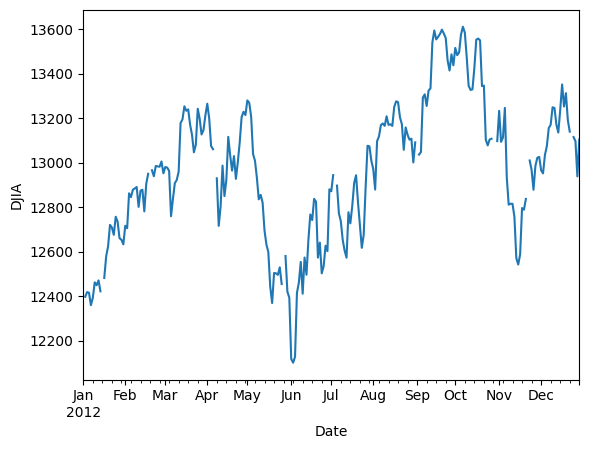

In [ ]:
DJIA_2012 = dj_df[dj_df.index.year == 2012].copy()
DJIA_2012.plot(legend=False)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

In [ ]:
DJIA_2012['forward 1W'] = DJIA_2012['DJIA'].shift(7) # add Nan for values that does not have previous ones
DJIA_2012['backward 1W'] = DJIA_2012['DJIA'].shift(-7) # the first element will be the 8a element from the original data, and so on. As the opposite, the last rows wont  be previous an will be Nan
DJIA_2012.iloc[:9]

DJIA  forward 1W  backward 1W
DATE                                         
2012-01-02       NaN         NaN     12449.45
2012-01-03  12397.38         NaN     12471.02
2012-01-04  12418.42         NaN     12422.06
2012-01-05  12415.70         NaN          NaN
2012-01-06  12359.92         NaN     12482.07
2012-01-09  12392.69         NaN     12578.95
2012-01-10  12462.47         NaN     12623.98
2012-01-11  12449.45         NaN     12720.48
2012-01-12  12471.02    12397.38     12708.82

In [ ]:
DJIA_2012.tail()

DJIA  forward 1W  backward 1W
DATE                                         
2012-12-25       NaN    13135.01          NaN
2012-12-26  13114.59    13235.39          NaN
2012-12-27  13096.31    13350.96          NaN
2012-12-28  12938.11    13251.97          NaN
2012-12-31  13104.14    13311.72          NaN

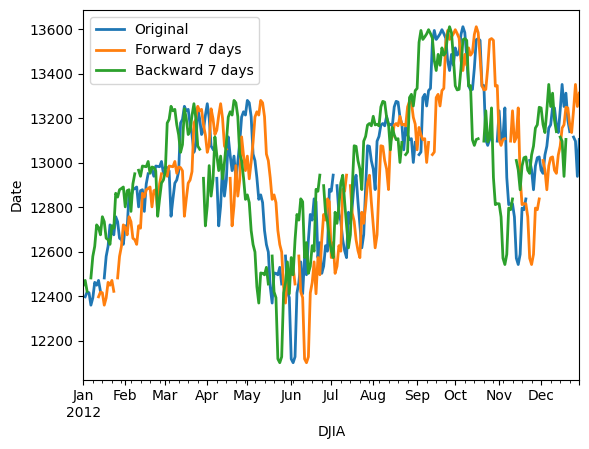

In [ ]:
ax = DJIA_2012.plot(lw=2)
ax.set_xlabel('DJIA')
ax.set_ylabel('Date')
ax.legend(['Original', 'Forward 7 days', 'Backward 7 days'])

One way of removing the trend of a dataset is to differentiate it. Pandas has the diff() function for it.

In [ ]:
DJIA_2012['diff'] = DJIA_2012['DJIA'].diff(1)
DJIA_2012

DJIA  forward 1W  backward 1W    diff
DATE                                                 
2012-01-02       NaN         NaN     12449.45     NaN
2012-01-03  12397.38         NaN     12471.02     NaN
2012-01-04  12418.42         NaN     12422.06   21.04
2012-01-05  12415.70         NaN          NaN   -2.72
2012-01-06  12359.92         NaN     12482.07  -55.78
...              ...         ...          ...     ...
2012-12-25       NaN    13135.01          NaN     NaN
2012-12-26  13114.59    13235.39          NaN     NaN
2012-12-27  13096.31    13350.96          NaN  -18.28
2012-12-28  12938.11    13251.97          NaN -158.20
2012-12-31  13104.14    13311.72          NaN  166.03

[261 rows x 4 columns]

In [ ]:
def differentiate(values, d=1, fill=False):
  x = values.diff(1).copy()

  # Replace the first Nan value with the first value of the series
  if fill:
    x.loc[0] = values.iloc[0]
  if d == 1:
    return x
  else:
    return differentiate(x, d-1)

def integrate(values, d=1):
  'The opposite function'

  x = values.cumsum().copy()

  if d == 1:
    return x
  else:
    return integrate(x, d-1)

In [ ]:
values = DJIA_2012[['DJIA']]
differences = differentiate(values, fill=True)

Text(0, 0.5, 'Differences')

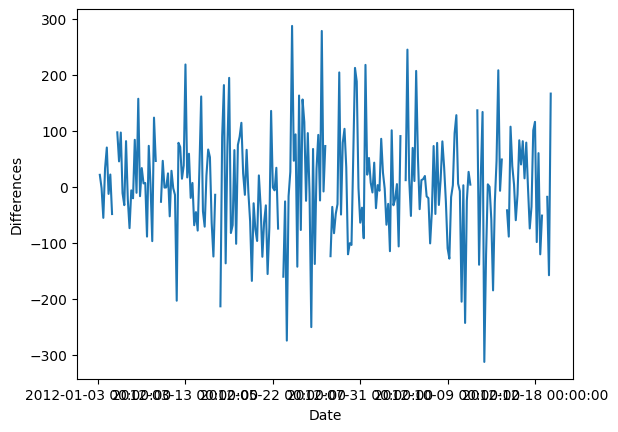

In [ ]:
# Notice that after remove the trend, it looks more stationary
ax = differences.iloc[1:].plot(legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('Differences')

In [ ]:
# reintegrate
rebuild = integrate(differences)

Another example is the Sun Activity.

In the example below, It is possible to see how the overlay of the peaks each 11 year, what shows the cyclical phenomenon

<ipython-input-55-4ef6906edad7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_df_activity['forward'] = sun_df_activity['SUNACTIVITY'].shift(11)
<ipython-input-55-4ef6906edad7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sun_df_activity['backward'] = sun_df_activity['SUNACTIVITY'].shift(-11)


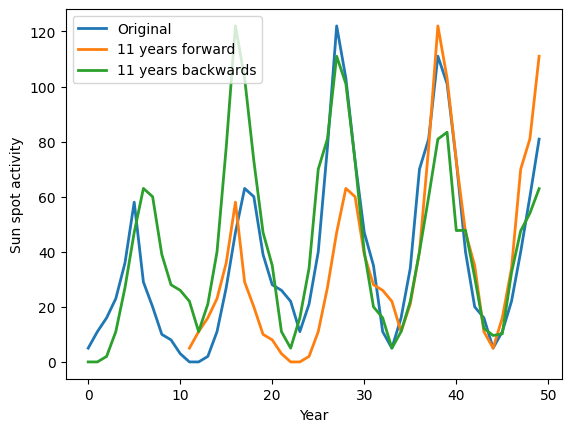

In [ ]:
sun_df_activity = sun_df[['SUNACTIVITY']]
sun_df_activity['forward'] = sun_df_activity['SUNACTIVITY'].shift(11)
sun_df_activity['backward'] = sun_df_activity['SUNACTIVITY'].shift(-11)

ax = sun_df_activity.iloc[:50].plot(lw=2)
ax.set_ylabel('Sun spot activity')
ax.set_xlabel('Year')
ax.legend(['Original', '11 years forward', '11 years backwards'])

## Missing

Approaches to input missing values

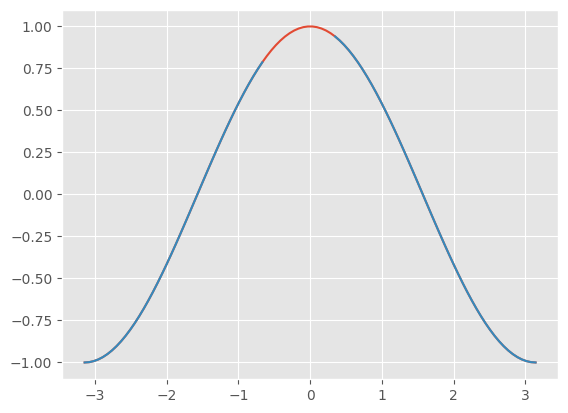

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.cos(x)
y_missing = y.copy()
y_missing[40:55] = np.nan

plt.plot(x, y)
plt.plot(x, y_missing)

Strategies for imputation

https://en.wikipedia.org/wiki/imputation_(statistics)

In [ ]:
def backward_fill(y):
  '''Use the last found value. Cannot be used for missing data at the beginning'''
  y0 = y.copy()
  N = len(y0)

  current = None
  for i in range(1, N):
    if np.isnan(y0[i]):
      y0[i] = current
    else:
      current = y0[i]

  return y0

In [ ]:
def forward_fill(y):
  '''Use the next found value. Cannot be used for missing data at the end'''
  y0 = y.copy()
  N = len(y0)

  current = None
  for i in range(N-1, 0, -1):
    if np.isnan(y0[i]):
      y0[i] = current
    else:
      current = y0[i]

  return y0

In [ ]:
slope = (1+5)/2
np.arange(1, 5+1)*slope

array([ 3.,  6.,  9., 12., 15.])

In [ ]:
def interpolate(y):
  '''Interpolate between previous and next connecting them with a straight line'''
  y0 = y.copy()
  N = len(y0)

  pos = 0
  while pos < N:
    if np.isnan(y0[pos]):
      count = 0
      while np.isnan(y0[pos+count]):
        count += 1
      current = y0[pos-1]
      future = y[pos+count]
      slope = (future-current)/count
      y0[pos:pos+count] = current + np.arange(1, count+1)*slope
      pos += count
    else:
      pos += 1
  return y0



In [ ]:
y_bfill = backward_fill(y_missing)
y_ffill = forward_fill(y_missing)
y_inter = interpolate(y_missing)

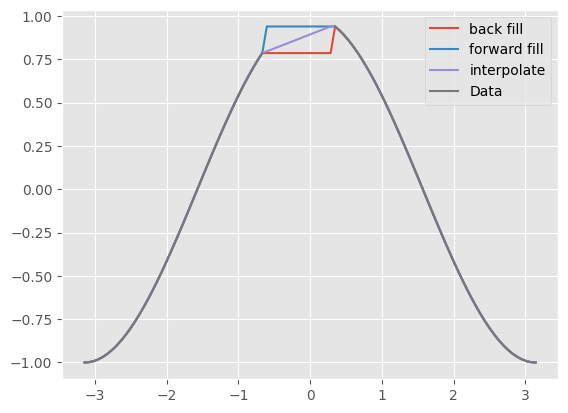

In [ ]:
plt.plot(x, y_bfill, label='back fill')
plt.plot(x, y_ffill, label='forward fill')
plt.plot(x, y_inter, label='interpolate')
plt.plot(x, y_missing, label='Data')
plt.legend()

## Resampling

### Aggregation

In [ ]:
mapping = dj_df.index.year
values = dj_df['DJIA'].values

In [ ]:
def groupBy(values, mapping, func=None):
  '''change the frequency from bottom to up. For instance: from days to years
  func can be any function that receives and array and returns an unique value or an array
  '''
  agg = {}
  pos = {}

  for i in range(values.shape[0]):
    key = mapping[i]

    if key not in agg:
      agg[key] = []

    pos[key] = i
    if not np.isnan(values[i]):
      agg[key].append(values[i])
    order = sorted(agg.keys())

    if func is not None:
      for key in agg:
        agg[key] =  func(np.array(agg[key]).astype('float'))

    return agg, pos

In [ ]:
agg, pos = groupBy(values, mapping, np.mean)
agg

{2009: 9885.8}

In [ ]:
aggregated = []

for key in pos:
  aggregated.append([pos[key], agg[key]])

aggregated = np.array(aggregated)
aggregated

array([[   0. , 9885.8]])

Text(0.5, 0, 'Date')

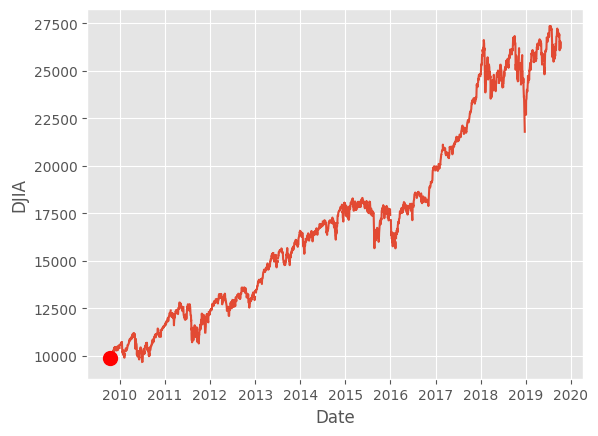

In [ ]:
plt.plot(dj_df.index, dj_df['DJIA'])
ax = plt.gca()
ax.plot(dj_df.index[aggregated.T[0].astype('int')], aggregated.T[1])
ax.plot(dj_df.index[aggregated.T[0].astype('int')], aggregated.T[1], 'ro', markersize=10)
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')

### Jackniffe estimators



In [ ]:
def jacknife(x, func, variance=False):
  N =  len(x)
  pos = np.arange(N)
  values = [func(x[pos != i]) for i in pos]
  jack = np.sum(values)/N

  if variance:
    values = [np.power(func(x[pos != i]) - jack, 2.0) for i in pos] # (std - jack)²
    var = (N-1)/(N * np.sum(values))
    return jack, var
  else:
    return jack

In [ ]:
x =  np.random.normal(0, 2, 100)
print(x.std())
jacknife(x, np.std, True) # returns jacniffe and variance (error)

2.221699770540248


(2.221533342278945, 41.973590261949646)

### Bootstrapping

In [ ]:
def bootstrapping(x, n_samples, func=np.mean):
  y = x.copy()
  N =  len(y)
  population = []
  for i in range(n_samples):
    population.append(func(np.random.choice(y, N, replace=True)))
  return np.array(population)

In [ ]:
def histogram(values, n_bins=100):
  xmax = values.max()
  xmin = values.min()
  delta = (xmax - xmin)/n_bins
  counts =  np.zeros(n_bins+1, dtype='int')
  for value in values:
    val_bin = np.around((value-xmin)/delta).astype('int')
    counts[val_bin] += 1.0

  bins = xmin+delta*np.arange(n_bins+1)
  print(bins, delta)
  return bins, counts/values.shape[0]

In [ ]:
x = np.random.normal(0, 2, 100)
print(x.mean(), x.std())

0.14376183506851134 2.0759292012406823


In [ ]:
boot = bootstrapping(x, 1000)
bins, counts = histogram(boot)

[-0.48218202 -0.4696254  -0.45706878 -0.44451215 -0.43195553 -0.41939891
 -0.40684229 -0.39428567 -0.38172904 -0.36917242 -0.3566158  -0.34405918
 -0.33150255 -0.31894593 -0.30638931 -0.29383269 -0.28127607 -0.26871944
 -0.25616282 -0.2436062  -0.23104958 -0.21849295 -0.20593633 -0.19337971
 -0.18082309 -0.16826647 -0.15570984 -0.14315322 -0.1305966  -0.11803998
 -0.10548335 -0.09292673 -0.08037011 -0.06781349 -0.05525687 -0.04270024
 -0.03014362 -0.017587   -0.00503038  0.00752625  0.02008287  0.03263949
  0.04519611  0.05775273  0.07030936  0.08286598  0.0954226   0.10797922
  0.12053585  0.13309247  0.14564909  0.15820571  0.17076233  0.18331896
  0.19587558  0.2084322   0.22098882  0.23354545  0.24610207  0.25865869
  0.27121531  0.28377193  0.29632856  0.30888518  0.3214418   0.33399842
  0.34655505  0.35911167  0.37166829  0.38422491  0.39678153  0.40933816
  0.42189478  0.4344514   0.44700802  0.45956465  0.47212127  0.48467789
  0.49723451  0.50979113  0.52234776  0.53490438  0

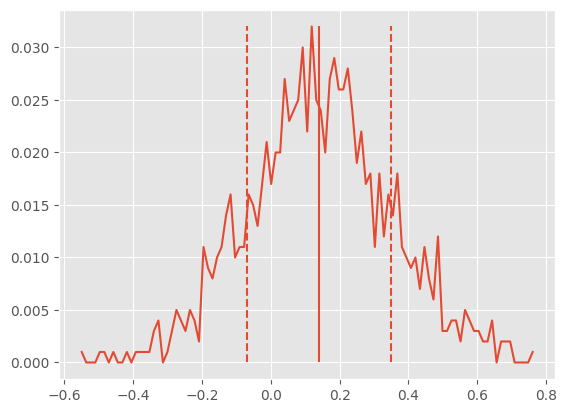

In [ ]:
plt.plot(bins, counts)
plt.vlines(x=boot.mean(), ymin=0, ymax=counts.max(), label='mean')
plt.vlines(x=boot.mean()+boot.std(), ymin=0, ymax=counts.max(), label='std', linestyle='--') # mean + 1 std
plt.vlines(x=boot.mean()-boot.std(), ymin=0, ymax=counts.max(), label='std', linestyle='--') # mean - 1 std


# Chapter 5 - Running values measures

## Windowing

In [ ]:
def rolling(values, window_size):
  npoints = values.shape[0] # quantity of elements
  running = []
  for i in range(npoints - window_size + 1):
    running.append(values[i : i + window_size])
  return np.array(running)

In [ ]:
values = np.arange(11)
values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
rolling(values, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 2,  3,  4,  5,  6,  7],
       [ 3,  4,  5,  6,  7,  8],
       [ 4,  5,  6,  7,  8,  9],
       [ 5,  6,  7,  8,  9, 10]])

In [ ]:
rolling(values, 6).mean(axis=1) # row mean

array([2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

Pandas already comes with a rolling function:

In [ ]:
dj_df_2010 = dj_df[dj_df.index.year ==  2010].copy().dropna()
dj_df_2010['mean6'] = dj_df_2010['DJIA'].rolling(6).mean() # 6 days
dj_df_2010['mean30'] = dj_df_2010['DJIA'].rolling(30).mean() # 30 days
dj_df_2010['mean60'] = dj_df_2010['DJIA'].rolling(60).mean() # 60 days
#dj_df_2010['comulative_sum'] = dj_df_2010['DJIA'].rolling(window='3D').sum() # 30 days

In [ ]:
dj_df_2010[dj_df_2010.index.month ==  1]

DJIA         mean6  mean30  mean60
DATE                                              
2010-01-04  10583.96           NaN     NaN     NaN
2010-01-05  10572.02           NaN     NaN     NaN
2010-01-06  10573.68           NaN     NaN     NaN
2010-01-07  10606.86           NaN     NaN     NaN
2010-01-08  10618.19           NaN     NaN     NaN
2010-01-11  10663.99  10603.116667     NaN     NaN
2010-01-12  10627.26  10610.333333     NaN     NaN
2010-01-13  10680.77  10628.458333     NaN     NaN
2010-01-14  10710.55  10651.270000     NaN     NaN
2010-01-15  10609.65  10651.735000     NaN     NaN
2010-01-19  10725.43  10669.608333     NaN     NaN
2010-01-20  10603.15  10659.468333     NaN     NaN
2010-01-21  10389.88  10619.905000     NaN     NaN
2010-01-22  10172.98  10535.273333     NaN     NaN
2010-01-25  10196.86  10449.658333     NaN     NaN
2010-01-26  10194.29  10380.431667     NaN     NaN
2010-01-27  10236.16  10298.886667     NaN     NaN
2010-01-28  10120.46  10218.438333     NaN     NaN
2010-01-29  10067.33  10164.680000     NaN     NaN

In [ ]:
dj_df_2010[dj_df_2010.index.month ==  2]

DJIA         mean6        mean30  mean60
DATE                                                    
2010-02-01  10185.53  10166.771667           NaN     NaN
2010-02-02  10296.85  10183.436667           NaN     NaN
2010-02-03  10270.55  10196.146667           NaN     NaN
2010-02-04  10002.18  10157.150000           NaN     NaN
2010-02-05  10012.23  10139.111667           NaN     NaN
2010-02-08   9908.39  10112.621667           NaN     NaN
2010-02-09  10058.64  10091.473333           NaN     NaN
2010-02-10  10038.38  10048.395000           NaN     NaN
2010-02-11  10144.19  10027.335000           NaN     NaN
2010-02-12  10099.14  10043.495000           NaN     NaN
2010-02-16  10268.81  10086.258333  10341.278667     NaN
2010-02-17  10309.24  10153.066667  10332.121333     NaN
2010-02-18  10392.90  10208.776667  10326.150667     NaN
2010-02-19  10402.35  10269.438333  10320.439667     NaN
2010-02-22  10383.38  10309.303333  10312.990333     NaN
2010-02-23  10282.41  10339.848333  10301.797667     NaN
2010-02-24  10374.16  10357.406667  10292.136667     NaN
2010-02-25  10321.03  10359.371667  10281.929000     NaN
2010-02-26  10325.26  10348.098333  10270.078667     NaN

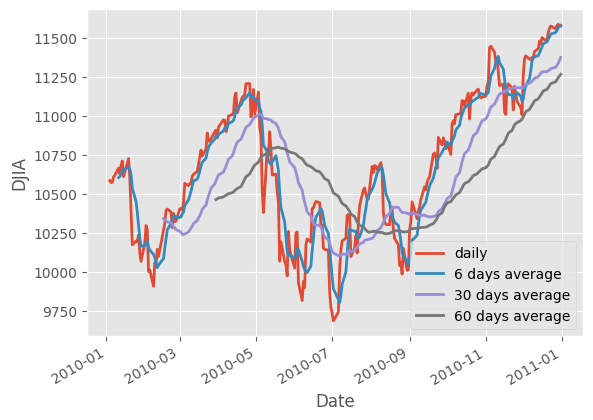

In [ ]:
dj_df_2010.plot(lw=2)
ax = plt.gca()
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')
ax.legend(['daily', '6 days average', '30 days average', '60 days average'])

Adding envelope

In [ ]:
dj_df_2010['max30'] = dj_df_2010['DJIA'].rolling(30).max()
dj_df_2010['min30'] = dj_df_2010['DJIA'].rolling(30).min()

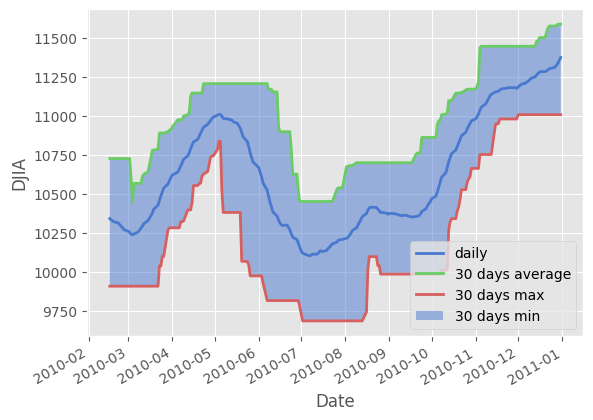

In [ ]:
ax = dj_df_2010[['mean30', 'max30', 'min30']].plot(lw=2)
ax.fill_between(x=dj_df_2010.index,
                y1=dj_df_2010['max30'].values,
                y2=dj_df_2010['min30'].values,
                alpha=0.5)
ax.set_ylabel('DJIA')
ax.set_xlabel('Date')
ax.legend(['daily', '30 days average', '30 days max', '30 days min'], loc='lower right')

## Bolinger Bands

Bollinger Bands are envelopes plotted at a standard deviation level above and below a simple moving average of the price.

In [ ]:
N = 20 # Moving average window size
K = 2 # Number of standard deviation
# the envelope size is average +- k*standard deviation

dj_df_2010['BBMA'] = dj_df_2010['DJIA'].rolling(30).mean()
dj_df_2010['BBUp'] = dj_df_2010['BBMA'] + K*dj_df_2010['DJIA'].rolling(30).std()
dj_df_2010['BBDown'] = dj_df_2010['BBMA'] - K*dj_df_2010['DJIA'].rolling(30).std()

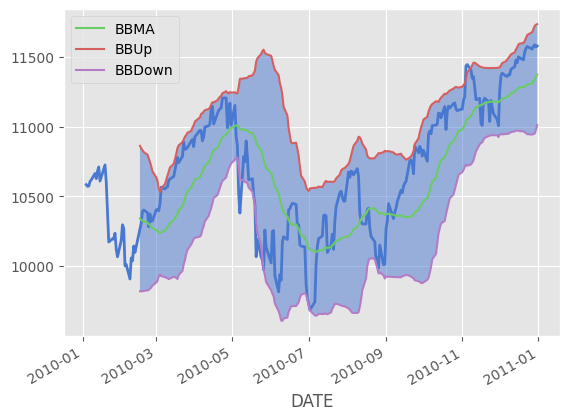

In [ ]:
ax = dj_df_2010.plot(y=['DJIA'], lw=2, legend=False)
ax.fill_between(x=dj_df_2010.index,
                y1=dj_df_2010['BBUp'].values,
                y2=dj_df_2010['BBDown'].values,
                alpha=0.5)
dj_df_2010.plot(y=['BBMA', 'BBUp', 'BBDown'], lw=1.5, ax=ax)
ax.set_label('DJIA')

In [ ]:
crosses = dj_df_2010[dj_df_2010['DJIA'] < dj_df_2010['BBDown']][['DJIA', 'BBDown']]
crosses

DJIA        BBDown
DATE                              
2010-05-06  10520.32  10711.231890
2010-05-07  10380.43  10621.401013
2010-05-20  10068.01  10318.288519
2010-05-21  10193.39  10239.227777
2010-05-24  10066.57  10146.217712
2010-05-25  10043.75  10059.936789

Text(0, 0.5, 'DJIA')

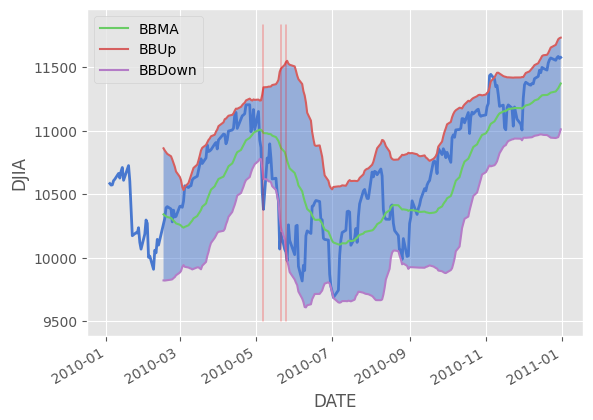

In [ ]:
# place a vertical red line when DJIA crossed the bands
ax = dj_df_2010.plot(y=['DJIA'], lw=2, legend=False)
dj_df_2010.plot(y=['BBMA', 'BBUp', 'BBDown'], lw=1.5, ax=ax)
ax.fill_between(x=dj_df_2010.index,
                y1=dj_df_2010['BBUp'].values,
                y2=dj_df_2010['BBDown'].values,
                alpha=0.5)
ymin, ymax = ax.get_ylim()
ax.vlines(x=crosses.index, ymax=ymax, ymin=ymin, colors='r', lw=0.5, alpha=0.3)
ax.set_ylabel('DJIA')


## Exponential Running Averages

Weight each point that contributes to a moving average in such a way that the older the point the more strongly it gets discounted.

In [ ]:
def EWMA(values, alpha=0.01):
  N = len(values)
  s = [values[0]]
  for i in range(1, N):
    s.append(alpha*values[i] + (1-alpha)*s[-1]) # alpha*current_value + (1-alpha)*last_value on the list
  return np.array(s)

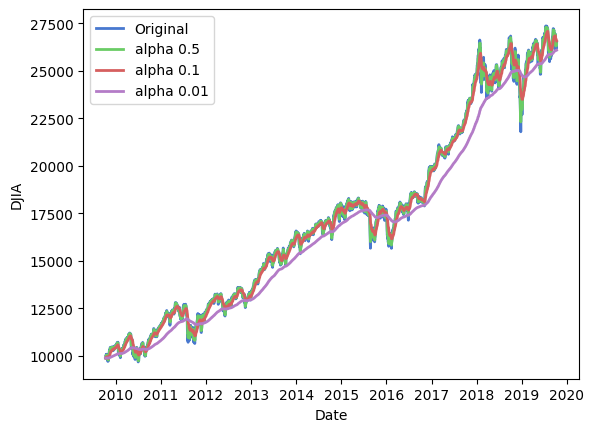

In [ ]:
df = dj_df.dropna()
ax=plt.plot(df.index,
        df['DJIA'],
        lw=2)

plt.plot(df.index,
        EWMA(df['DJIA'], 0.5),
        label=r'$\alpha=0.5$',
        lw=2)

plt.plot(df.index,
        EWMA(df['DJIA'], 0.1),
        label=r'$\alpha=0.1$',
        lw=2)

plt.plot(df.index,
        EWMA(df['DJIA'], 0.01),
        label=r'$\alpha=0.01$',
        lw=2)

plt.ylabel('DJIA')
plt.xlabel('Date')
plt.legend(['Original', 'alpha 0.5', 'alpha 0.1', 'alpha 0.01'])

Pandas already comes with a ewm function that has some moving metrics options:
- mean()
- var()
- std()
- corr()
- cov()

Text(0, 0.5, 'DJIA')

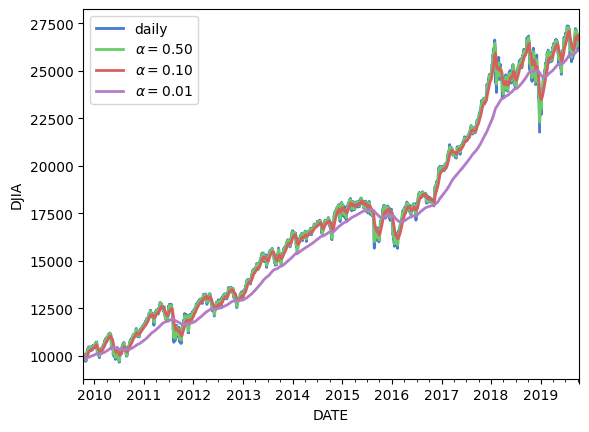

In [ ]:
dj_df['alpha50'] = dj_df['DJIA'].ewm(alpha=0.50, adjust=False).mean()
dj_df['alpha10'] = dj_df['DJIA'].ewm(alpha=0.10, adjust=False).mean()
dj_df['alpha1'] = dj_df['DJIA'].ewm(alpha=0.01, adjust=False).mean()

ax = dj_df.plot(y=['DJIA', 'alpha50', 'alpha10', 'alpha1'], lw=2)
ax.legend(['daily', r'$\alpha=0.50$', r'$\alpha=0.10$', r'$\alpha=0.01$'])
ax.set_ylabel('DJIA')

The difference between adjust=True and adjust=False is only noticeable in the first steps and are related about different assumptions about the first point in the series. After the first points it becomes constant (see below). Lowest alpha, high the difference.

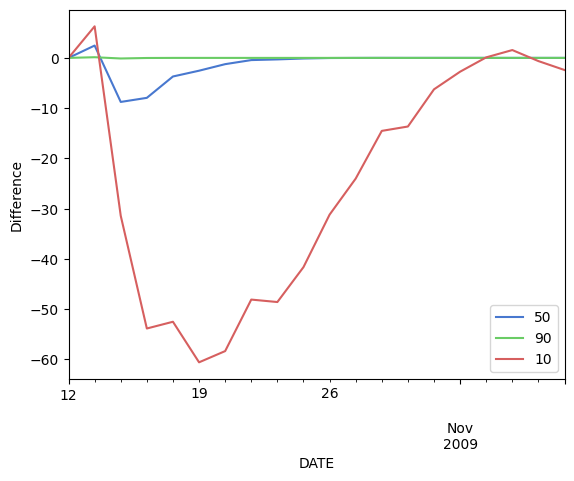

In [ ]:
ax = (df['DJIA'].ewm(alpha=0.50, adjust=False).mean() - df['DJIA'].ewm(alpha=0.50, adjust=True).mean())[:20].plot()
(df['DJIA'].ewm(alpha=0.90, adjust=False).mean() - df['DJIA'].ewm(alpha=0.90, adjust=True).mean())[:20].plot(ax=ax)
(df['DJIA'].ewm(alpha=0.10, adjust=False).mean() - df['DJIA'].ewm(alpha=0.10, adjust=True).mean())[:20].plot(ax=ax)

ax.set_ylabel('Difference')
ax.legend(['50', '90', '10'])

### Forecasting

EWMA can be used for forecasting. Is expected the value at t+1, or Zt+1, to be:

Zt+1 = alpha*Xt + (1-alpha)*Zt
Zt+1 = Zt + alpha(Xt - Zt)

Where:

Xt: current value at t
Zt: EWMA value at t

The forecasted value will be the EWMA value at t plus the scaled error between Xt and Zt.

In [ ]:
def ewma_forecast(value, ewm, alpha):
  return alpha*value+(1-alpha)*ewm

def forecast(values, alpha, N):
  ewma = values.ewm(alpha=alpha, adjust=False).mean()
  new_values = []
  for i in range(N, values.shape[0]):
    new_values.append(ewma_forecast(values.iloc[i-1], ewma.iloc[i-1], alpha))
  return new_values

In [ ]:
N = 100
df = dj_df[dj_df.index.year == 2010].dropna()
forecast03 = forecast(df['DJIA'], 0.3, N)
forecast05 = forecast(df['DJIA'], 0.5, N)
forecast07 = forecast(df['DJIA'], 0.7, N)

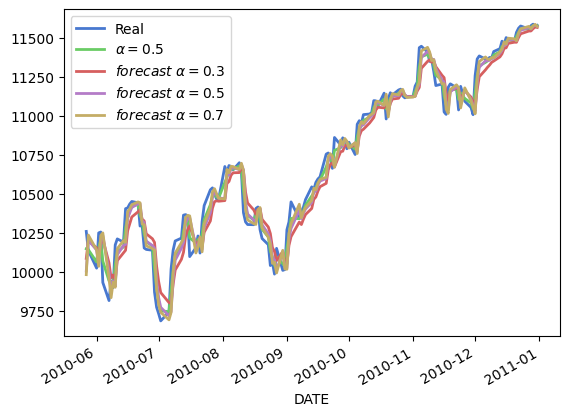

In [ ]:
ax = df.iloc[N:].plot(y='DJIA', lw=2)
df.iloc[N:].plot(y=['alpha50'], lw=2, ax=ax)
ax.plot(df.index[N:], forecast03, lw=2)
ax.plot(df.index[N:], forecast05, lw=2)
ax.plot(df.index[N:], forecast07, lw=2)

ax.legend(['Real',
           r'$\alpha=0.5$',
           r'$forecast~\alpha=0.3$',
           r'$forecast~\alpha=0.5$',
           r'$forecast~\alpha=0.7$'])

#### Choice of alpha

Start the choice the alpha by quantifying the difference between the original and the exponentially smoothed version.

In [ ]:
def RMSE(original_values, ewm_values):
  error = np.sqrt(np.power(original_values - ewm_values, 2.0).mean())
  return error

In [ ]:
err = []
alphas = np.linspace(0.01, 1, 100)
for alpha in alphas:
  err.append(RMSE(df['DJIA'].iloc[N:], forecast(df['DJIA'], alpha, N)))

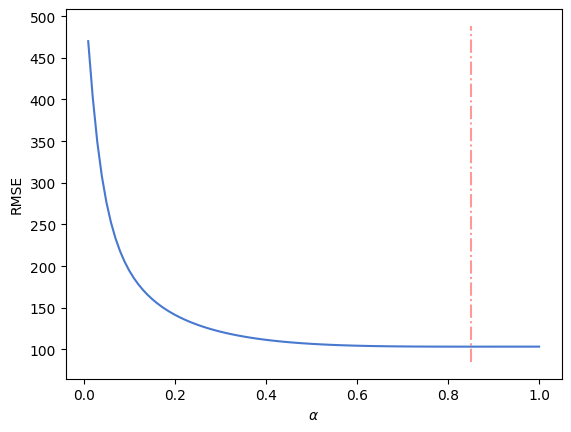

In [ ]:
plt.plot(alphas, err)
ax = plt.gca()
ax.set_ylabel('RMSE')
ax.set_xlabel(r'$\alpha$')

opt_alpha = alphas[np.argmin(err)] # argmin returns the indices of the minimum values along an axis.

ax.vlines(opt_alpha, *ax.get_ylim(), linestyle='-.', colors='r', alpha=0.4)

# Chapter 6 - Fourier Analysis

In [ ]:
from numpy import fft
from mpl_toolkits.mplot3d import Axes3D

['Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (1.25.2)']

## Fake Data

In [ ]:
t_max = 4 # signal duration
sample_freq = 250
N = t_max*sample_freq
t = np.linspace(0, t_max, N)
amp = np.array([1, .3, .1])
freq = np.array([1, 2, 10])

In [ ]:
def build_signal(amp, freq, t):
  '''combine components into a signal'''
  total = np.zeros(len(t))
  components = []
  n_freq = len(freq)

  for i in range(n_freq):
    current = amp[i]*np.cos(2*np.pi*freq[i]*t)
    total += current
    components.append(current)
  return total, components

In [ ]:
total, components = build_signal(amp, freq, t)

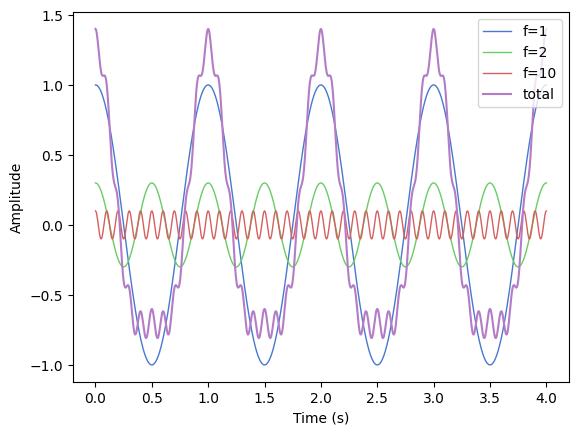

In [ ]:
for i, comp in enumerate(components):
  plt.plot(t, comp, label='f=%g' % freq[i], lw=1)
plt.plot(t, total, label='total')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

(0.0, 12.0)

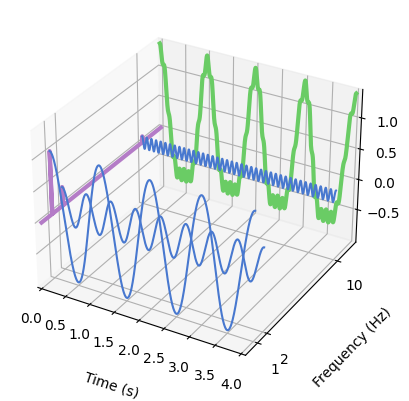

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #xyz
ax.set_xlabel('\n\nTime (s)', fontsize=10)
ax.set_ylabel('\n\nFrequency (Hz)', fontsize=10)
ax.set_zlabel('\n\nAmplitude (s)', fontsize=10)

linewidth = 1
n_freq = np.max(freq)+2
x = np.linspace(0,4,1000)
y = np.ones(x.size)

# Plot the total signal (x,y,z)
ax.plot(x, y*n_freq, total,  #x,y,z
        linewidth=3,
        color=colors[1])

# plot the amplitude
z = np.zeros(n_freq*100)
z[freq*100] = amp

ax.plot(np.zeros(n_freq*100), np.linspace(0, n_freq, n_freq*100), z, linewidth=3, color=colors[3])

y = np.ones(1000)
for i in range(0, len(components)):
  ax.plot(x, y*freq[i], components[i], linewidth=1.5, color=colors[0])

ax.set_yticks(freq)
ax.set_yticklabels(freq)
ax.set_xlim(0, t_max)
ax.set_ylim(0, n_freq)

## Decompose a signal

In [ ]:
fft_values = fft.fft(total)

In [ ]:
fft_values.dtype

dtype('complex128')

In [ ]:
fft_real = 2.0/N *np.abs(fft_values[0:N//2])

In [ ]:
# only a few values are significantily different from zero
np.where(fft_real>0.01)

(array([ 4,  8, 40]),)

In [ ]:
freq_resolution = sample_freq/N
freq_resolution

0.25

In [ ]:
freq_values = np.arange(N)*freq_resolution
freq_values[:10]

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25])

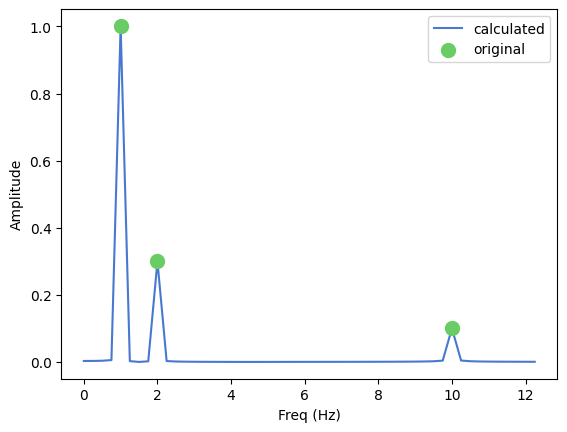

In [ ]:
plt.plot(freq_values[:50], fft_real[:50], label='calculated')
plt.scatter(freq, amp, s=100, color=colors[1], zorder=3, label='original')
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude')
plt.legend()

### FFT in the ILI dataset

In [ ]:
ILI = pd.read_csv('CDC.csv')
ILI = pd.read_csv('CDC.csv')
ILI['date'] = ILI['Year'] + ILI['Week']/52

Text(0, 0.5, '% Mortality')

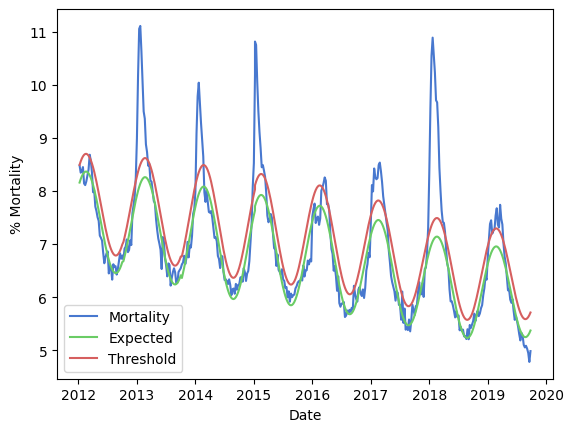

In [ ]:
ILI.plot(x='date', y=['Percent of Deaths Due to Pneumonia and Influenza', 'Expected', 'Threshold'])
ax = plt.gca()
ax.legend(['Mortality', 'Expected', 'Threshold'])
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')

In [ ]:
# Calc the FFT

signal = ILI['Percent of Deaths Due to Pneumonia and Influenza'].values
date = ILI['date']
N = len(signal)
fft_values = fft.fft(signal)

In [ ]:
# Calc the frequencies

freq_values = fft.fftfreq(N, 1/52) # 52 weeks per year

Text(0, 0.5, 'Amplitude')

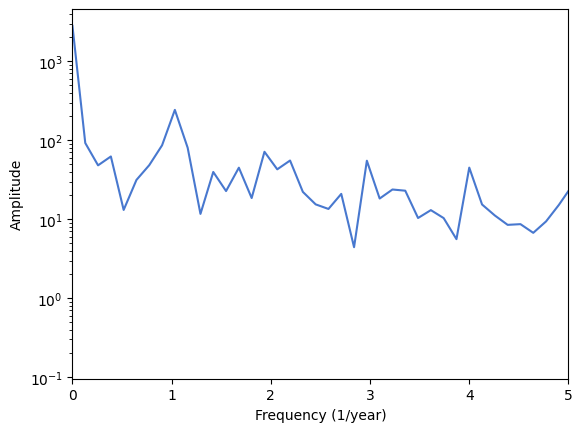

In [ ]:
# Plot the amplitude as a function of frequency

fig, ax = plt.subplots(1)
ax.semilogy(freq_values[:N//2], np.abs(fft_values[:N//2]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('Amplitude')

# The plot says that there is an annual seasonality
# the amplitude is in log scale

It is also possible to remove some of the noise by filtering out some of the higher frequencies. To do this we can set frequencies > 2 years to zero.

In [ ]:
filtered = fft_values.copy()
filtered[np.abs(freq_values) > 2] = 0

In [ ]:
signal_filtered = np.real(fft.ifft(filtered))

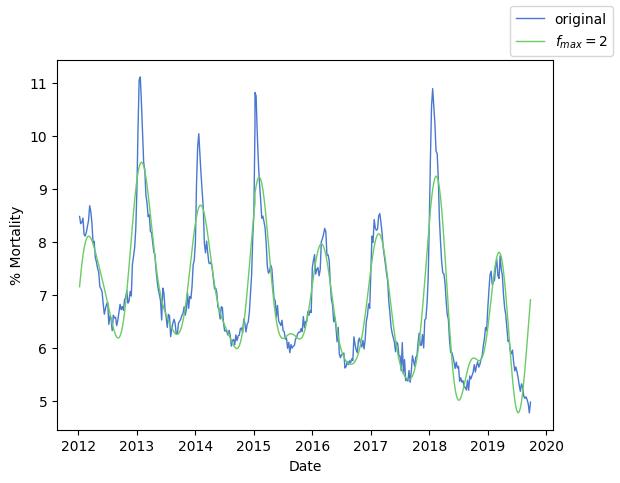

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(date, signal, lw=1, label='original')
ax.plot(date, signal_filtered, lw=1, label='$f_{max}=2$')
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')
fig.legend()

### Extrapolation

In [ ]:
N = len(signal)

fft_values = fft.fft(signal)
freq_values = fft.fftfreq(N)

# extend the signal for N time steps
time = np.arange(0, 2*N)
rebuilt = np.zeros(2*N)

for i, value in enumerate(filtered):
  ampli = np.absolute(value)
  phase = np.angle(value)
  rebuilt += ampli * np.cos(2 * np.pi * freq_values[i] * time + phase)

rebuilt /= N

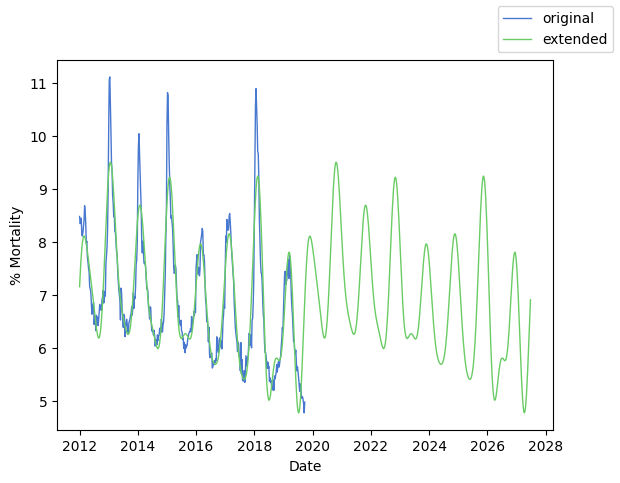

In [ ]:
# compare original and extended
fig, ax = plt.subplots(1)
ax.plot(time[:N]/52+2012, signal, lw=1, label='original')
ax.plot(time/52+2012, rebuilt, lw=1, label='extended')
ax.set_xlabel('Date')
ax.set_ylabel('% Mortality')
fig.legend()

# Chapter 7 - Correlation

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

import scipy
from scipy import stats

## Pearson Correlation

In [ ]:
def pearson(x,y):
  meanx = x.mean()
  meany = y.mean()
  stdx = x.std()
  stdy = y.std()
  return np.mean((x-meanx)*(y-meany)) / (stdx*stdy)

In [ ]:
# random data uncorrelated
x = np.random.random(1000)
y = np.random.random(1000)

In [ ]:
pearson(x,y)

0.007610074280629094

In [ ]:
pearson(y,y)

0.9999999999999998

Text(0, 0.5, 'y')

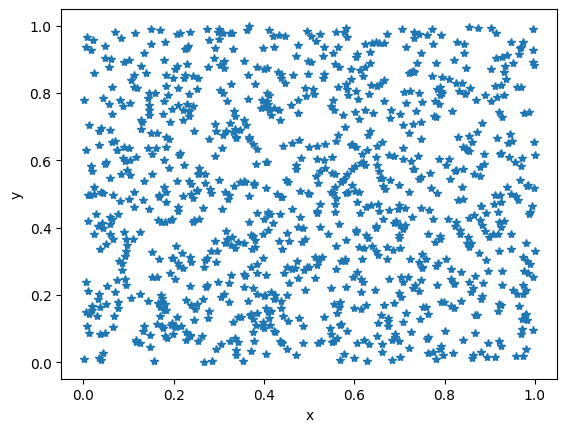

In [ ]:
fig, axs = plt.subplots(1,1)
axs.plot(x, y, '*')
axs.set_xlabel('x')
axs.set_ylabel('y')

In [ ]:
# add a linear line (trend line)
trend = np.linspace(1, 5, 1000)
trend

array([1.        , 1.004004  , 1.00800801, 1.01201201, 1.01601602,
       1.02002002, 1.02402402, 1.02802803, 1.03203203, 1.03603604,
       1.04004004, 1.04404404, 1.04804805, 1.05205205, 1.05605606,
       1.06006006, 1.06406406, 1.06806807, 1.07207207, 1.07607608,
       1.08008008, 1.08408408, 1.08808809, 1.09209209, 1.0960961 ,
       1.1001001 , 1.1041041 , 1.10810811, 1.11211211, 1.11611612,
       1.12012012, 1.12412412, 1.12812813, 1.13213213, 1.13613614,
       1.14014014, 1.14414414, 1.14814815, 1.15215215, 1.15615616,
       1.16016016, 1.16416416, 1.16816817, 1.17217217, 1.17617618,
       1.18018018, 1.18418418, 1.18818819, 1.19219219, 1.1961962 ,
       1.2002002 , 1.2042042 , 1.20820821, 1.21221221, 1.21621622,
       1.22022022, 1.22422422, 1.22822823, 1.23223223, 1.23623624,
       1.24024024, 1.24424424, 1.24824825, 1.25225225, 1.25625626,
       1.26026026, 1.26426426, 1.26826827, 1.27227227, 1.27627628,
       1.28028028, 1.28428428, 1.28828829, 1.29229229, 1.29629

In [ ]:
pearson(x+trend, y+trend) # now we have a strong correlation
# the additin of a common trend is sufficient to overwhelm the randomness of the data
# this explaind why it is import to detrend the data before correlation!

0.9428633935531793

Text(0, 0.5, 'y + trend')

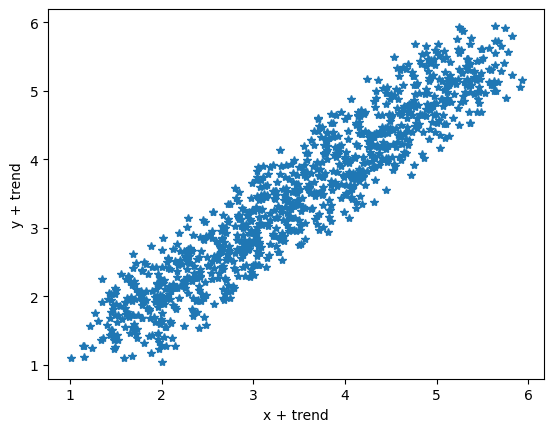

In [ ]:
plt.plot(x+trend, y+trend, '*')
plt.xlabel('x + trend')
plt.ylabel('y + trend')

## Auto-correlation (ACF)

In [ ]:
def acf(x, lag=40):
  return np.array([1] + [pearson(x[:-i], x[i:]) for i in range(1, lag)])

Text(0, 0.5, 'ACF')

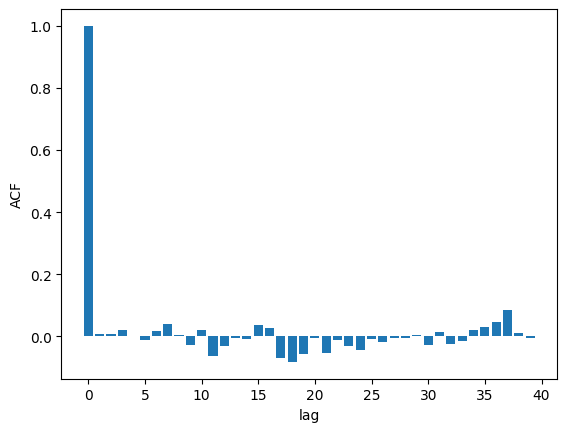

In [ ]:
# As we increase the lag, the correlation decreases until near zero
plt.bar(range(40), acf(x, 40))
plt.xlabel('lag')
plt.ylabel('ACF')

In [ ]:
# add a confidence interval for the acf
def acf_ci(acfv, n, alpha=0.05):
  se = [1 / np.sqrt(n)] # This line initializes the standard error for lag 0, assuming the variance of the time series is 1. This is a common assumption when normalizing the ACF.
  #For other lags, the standard error takes into account the sum of squares of the ACF values up to that point. It uses the Using Bartlett's formula to compute the standard errors for subsequent lags.
  #acfv[1:-1] selects the ACF values from lag 1 to lag n-1. After that,  squares these ACF values.
  #np.cumsum(np.power(acfv[1:-1], 2)) computes the cumulative sum of the squared ACF values.
  #The formula 1 + 2*np.cumsum(np.power(acfv[1:-1], 2)) represents the variance of the ACF estimator at different lags.
  #This is based on the Bartlett's formula for the standard errors of the ACF. Dividing by n and taking the square root gives the standard error for each lag.
  se.extend(np.sqrt((1 + 2*np.cumsum(np.power(acfv[1:-1], 2)))/n))
  se = np.array(se)
  se *= stats.norm.ppf(1-alpha/2.)
  return se

In [ ]:
def plot_acf(x, lag=40, alpha=0.05):
  acf_val = acf(x, lag)

  plt.vlines(range(lag), 0, acf_val)
  plt.scatter(np.arange(lag), acf_val, marker='o')
  plt.xlabel('lag')
  plt.ylabel('ACF')

  # Confidence Interval
  ci = acf_ci(acf_val, len(x), alpha)
  plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

<ipython-input-43-e691a17e8506>:2: RuntimeWarning: Mean of empty slice.
  meanx = x.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-43-e691a17e8506>:3: RuntimeWarning: Mean of empty slice.
  meany = y.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, ax

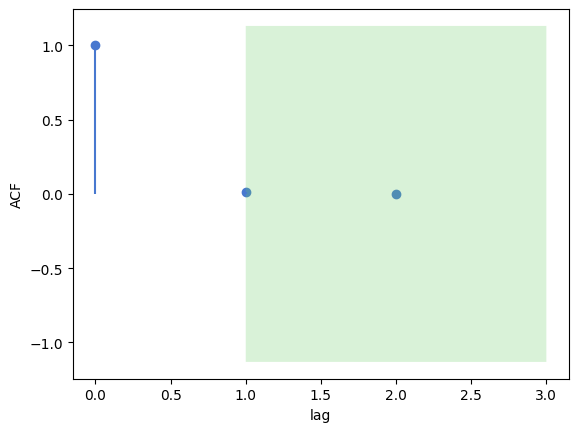

In [ ]:
plot_acf(x)

Real data example

In [ ]:
gdp_df.head()

GDP
DATE                
1947-01-01  2033.061
1947-04-01  2027.639
1947-07-01  2023.452
1947-10-01  2055.103
1948-01-01  2086.017

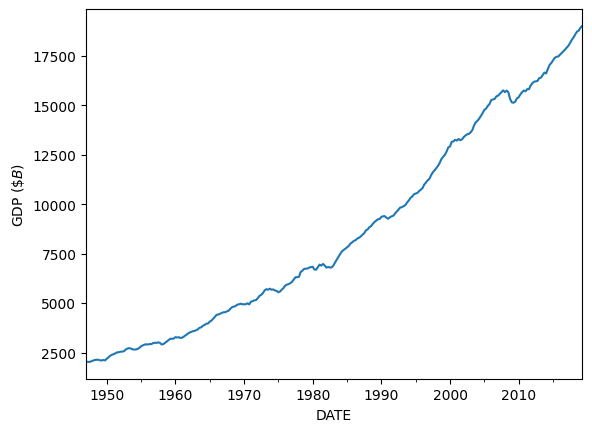

In [ ]:
gdp_df.plot(legend=False)
plt.gca().set_ylabel(r'GDP ($\$B$)')
values = gdp_df['GDP'].values
detrended = values[1:] - values[:-1]

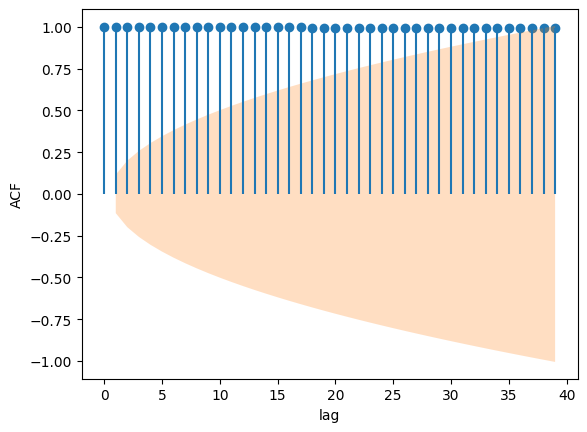

In [ ]:
plot_acf(values) # since the series has a very strong trend, the acf function appears to be significant for long periods. So it indicates the the time series is not stationary

Text(0, 0.5, 'QoQ Change ($\\$B$)')

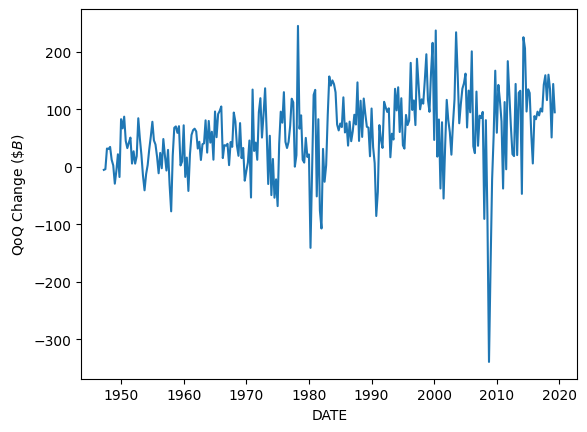

In [ ]:
# detrending the data
plt.plot(gdp_df.index[1:], detrended)
plt.xlabel('DATE')
plt.ylabel(r'QoQ Change ($\$B$)')

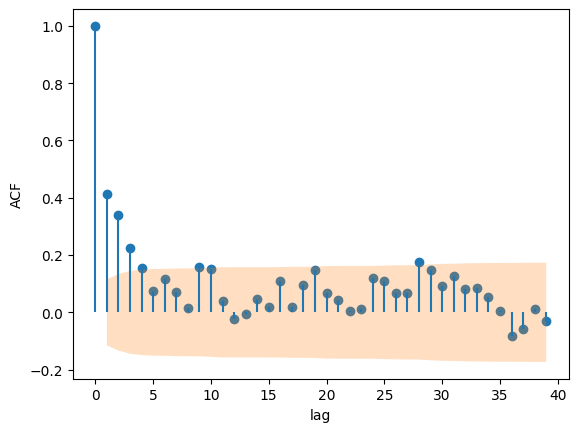

In [ ]:
# now, when we plot the acf function, no more all lags are significant as we should expect
plot_acf(detrended)

## Partial Auto-correlation (PACF)

ACF consider the entire time series for each lag. PACF try to account for the ammount of correlation that has already been explained by previous lags by using a linear model to predict xt and xt-l.

In [ ]:
def rolling(x, order): # order ir the window size. Ex for order 3, it will generate windows of size 3
  'Rolling window'
  npoints = x.shape[0] # 1000
  running = []
  for i in range(npoints - order + 1): # 0 a 998
    running.append(x[i : i+order]) #0-3, 1-4, 2-5, ..., 998-1001
  return np.array(running)

In [ ]:
rolling(x, 3)

array([[0.00790647, 0.60243533, 0.63382927],
       [0.60243533, 0.63382927, 0.32611496],
       [0.63382927, 0.32611496, 0.95069928],
       ...,
       [0.39518201, 0.01815732, 0.22946369],
       [0.01815732, 0.22946369, 0.6398104 ],
       [0.22946369, 0.6398104 , 0.48158752]])

In [ ]:
def pacf(x, lag=0):
  y = []
  for i in range(3, lag + 2):
    windows = rolling(x, i)
    xt =  windows[:, -1] # current values are at the end (takes the last column of the array)
    xt_l = windows[:, 0] # lagged values are at zero (takes the first column of the array)
    inter =  windows[:, 1: -1] # intermediate values are between 1 and -1 (takes the intermediate columns of the array)

    lm = LinearRegression(fit_intercept=False).fit(inter, xt)
    xt_fit = lm.predict(inter)

    lm = LinearRegression(fit_intercept=False).fit(inter, xt_l)
    xt_l_fit = lm.predict(inter)

    y.append(pearson(xt - xt_fit, xt_l - xt_l_fit))
  pacf_l = acf(x, 2)[1]
  return np.array([1, pacf_l] + y)

In [ ]:
def plot_pacf(x, alpha=0.05, lag=40):
  pacf_val = pacf(x, lag)
  plt.vlines(np.arange(lag + 1), 0, pacf_val)
  plt.scatter(np.arange(lag + 1), pacf_val, marker='o')
  plt.xlabel('lag')
  plt.ylabel('PACF')

  #confidence interval
  ci = acf_ci(pacf_val, len(x))
  plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

In [ ]:
plot_pacf(detrended)

# Chapter 7 - Random Walks

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

import scipy
from scipy import stats

In [ ]:
def flip_coin(n_coins, n_times, p=0.5):
  '''Coin flips generator to simulates random walks.
  Returns -1 and 1.
  '''
  return 2*(np.random.random((n_times, n_coins)) <p)-1

In [ ]:
steps = flip_coin(3, 1000)
steps

array([[ 1,  1, -1],
       [ 1, -1,  1],
       [ 1, -1,  1],
       ...,
       [ 1, -1,  1],
       [ 1, -1, -1],
       [-1,  1, -1]])

In [ ]:
position = steps.cumsum(axis=0)
position

array([[  1,   1,  -1],
       [  2,   0,   0],
       [  3,  -1,   1],
       ...,
       [-46,  10,  36],
       [-45,   9,  35],
       [-46,  10,  34]])

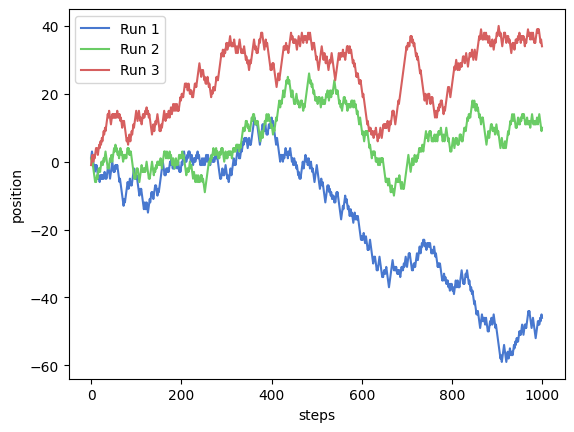

In [ ]:
plt.plot(np.arange(1000), position.T[0], label='Run 1')
plt.plot(np.arange(1000), position.T[1], label='Run 2')
plt.plot(np.arange(1000), position.T[2], label='Run 3')
plt.xlabel('steps')
plt.ylabel('position')
plt.legend()

Text(0, 0.5, '$\\epsilon_i$')

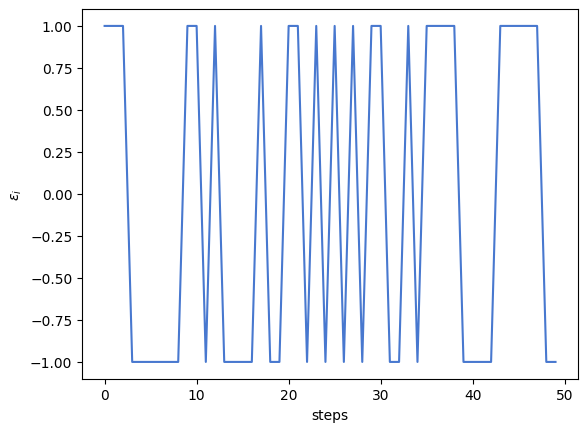

In [ ]:
# zoom in a specific range
plt.plot(np.arange(50), steps.T[0][:50])
plt.xlabel('steps')
plt.ylabel(r'$\epsilon_i$')

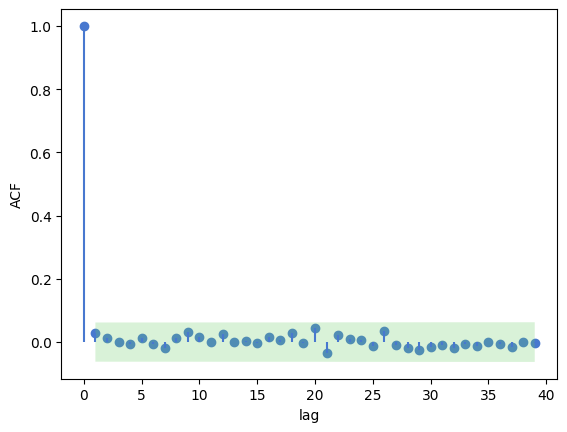

In [ ]:
plot_acf(steps) # nothing is significant

### Dick-Fuller Test

This test relies on a statiscal test for a unit root.
We modify our random walk simulation to take the parameter 'rho' into account.

In [ ]:
def position_rho(steps, rho):
  position = steps.astype('float').copy()
  for i in range(1, steps.shape[0]):
    position[i] = rho*position[i-1]+steps[i]
  return position

In [ ]:
n_steps = 4
rho_lst = np.linspace(0, 1, n_steps) # varying rho we can interpolate between stationary and non-stationary
steps =  flip_coin(1, 1000)

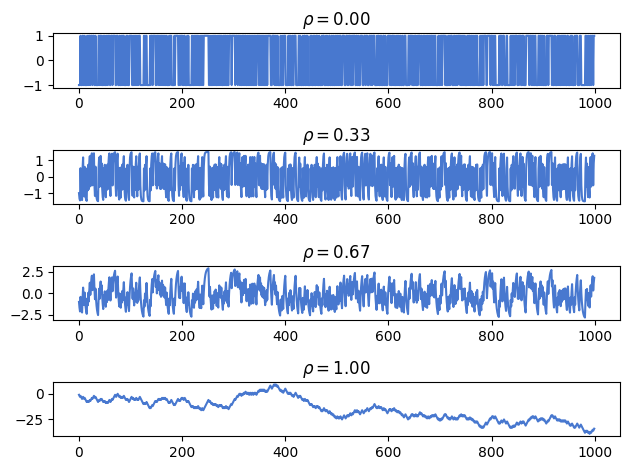

In [ ]:
fig, axs = plt.subplots(n_steps, 1)

for i, rho in enumerate(rho_lst):
  position = position_rho(steps, rho)
  axs[i].plot(position)
  axs[i].set_title(r'$\rho=%1.2f$' % rho)

fig.tight_layout()

In [ ]:
def differentiate(values, d=1):
  ''''''
  # first val is required so that we can recover the original values with np.cumsum
  x = np.concatenate([[values[0]], values[1:]-values[:-1]])

  if d == 1:
    return x
  else:
    return difference(x, d-1)

In [ ]:
# a simple version of the test returns the slope of the fit
def dftest(values):
  N = len(values)
  diff = differentiate(values)

  lm = LinearRegression()
  lm.fit(values[:-1], diff[1:])
  return lm.coef_

In [ ]:
# the more different from zero it is the more strongly we can be sure that the process is stationary
position = position_rho(steps, 0) # rho 0: stationary
dftest(position)

array([[-1.05628145]])

In [ ]:
position = position_rho(steps, 0.8)
dftest(position)

array([[-0.21412453]])

In [ ]:
position = position_rho(steps, 1) # rho 1: random walk
dftest(position)

array([[-0.00367479]])

# Chapter 8 - ARIMA Models

Modelo auto-regressivo integrado de médias móveis (autoregressive integrated moving average) é composto por 3 partes:
- MA (Moving Average Models)
- Integrative "Model"
- AR (Autoregressive Model)

## Moving Average Models (MA)

In [ ]:
def MA(epsilon, theta, mean=0):
  theta = list(theta)
  N = len(epsilon)
  theta0 = np.array([1] + theta) # theta zero is always 1
  theta0 = theta0[::-1] #invert the order
  q = len(theta0) # number of significant lags
  X = []
  for i in range(N-q):
    X.append(np.dot(theta0, epsilon[i:i+q]) + mean)
  return np.array(X)

The function simply multiplies the coeficients "theta" with the running values of the stochastic variables "epsilon".

In [ ]:
thetas = []
X_MA = []
q_max = 8
N = 500
epsilon = np.random.normal(size=N) # normalized data points

# generate MA models for each lag value
for q in range(1, q_max+1, 2): # 1, 3, 5, 7 (lags)
  thetas.append(np.random.random(q)) # generate random queues according to the number of lags
  X_MA.append(MA(epsilon, thetas[-1])) # pass to MA function the epsilon points and the thetas list

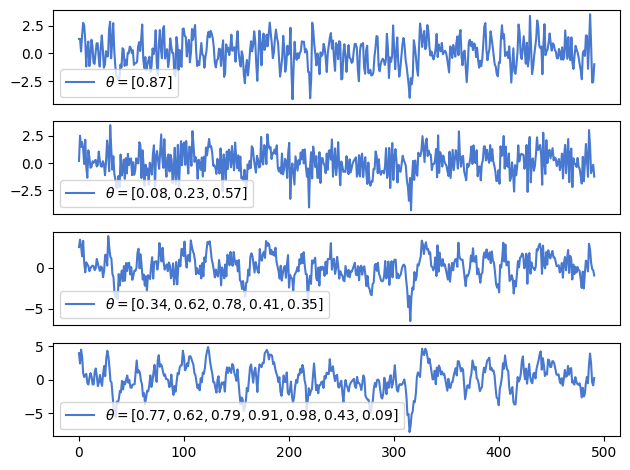

In [ ]:
# plotting the results
fig, axs = plt.subplots(4,1)
for i in range(q_max//2):
  axs[i].plot(X_MA[i])
  axs[i].legend([r'$\theta=\left[%s\right]$' % ", ".join(thetas[i].round(2).astype('str'))], prop={'size':10})
  axs[i].get_xaxis().set_visible(False)

axs[-1].get_xaxis().set_visible(True)
fig.tight_layout()

In [ ]:
def pearson(x,y):
  meanx = x.mean()
  meany = y.mean()
  stdx = x.std()
  stdy = y.std()
  return np.mean((x-meanx)*(y-meany)) / (stdx*stdy)

def acf(x, lag=40):
  return np.array([1] + [pearson(x[:-i], x[i:]) for i in range(1, lag)])

# add a confidence interval for the acf
def acf_ci(acfv, n, alpha=0.05):
  se = [1 / np.sqrt(n)] # This line initializes the standard error for lag 0, assuming the variance of the time series is 1. This is a common assumption when normalizing the ACF.
  #For other lags, the standard error takes into account the sum of squares of the ACF values up to that point. It uses the Using Bartlett's formula to compute the standard errors for subsequent lags.
  #acfv[1:-1] selects the ACF values from lag 1 to lag n-1. After that,  squares these ACF values.
  #np.cumsum(np.power(acfv[1:-1], 2)) computes the cumulative sum of the squared ACF values.
  #The formula 1 + 2*np.cumsum(np.power(acfv[1:-1], 2)) represents the variance of the ACF estimator at different lags.
  #This is based on the Bartlett's formula for the standard errors of the ACF. Dividing by n and taking the square root gives the standard error for each lag.
  se.extend(np.sqrt((1 + 2*np.cumsum(np.power(acfv[1:-1], 2)))/n))
  se = np.array(se)
  se *= stats.norm.ppf(1-alpha/2.)
  return se

def plot_acf(x, lag=40, alpha=0.05):
  acf_val = acf(x, lag)

  plt.vlines(range(lag), 0, acf_val)
  plt.scatter(np.arange(lag), acf_val, marker='o')
  plt.xlabel('lag')
  plt.ylabel('ACF')

  # Confidence Interval
  ci = acf_ci(acf_val, len(x), alpha)
  plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)



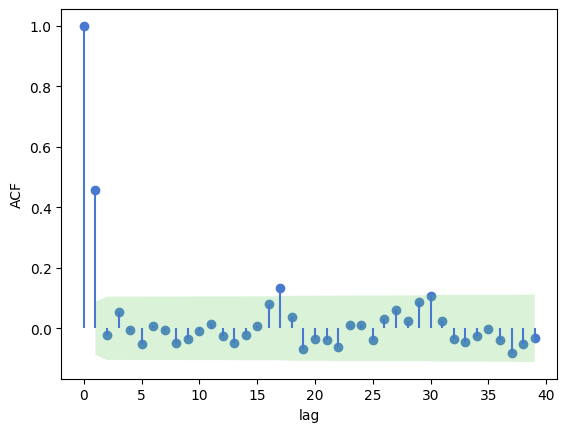

In [ ]:
plot_acf(X_MA[0])

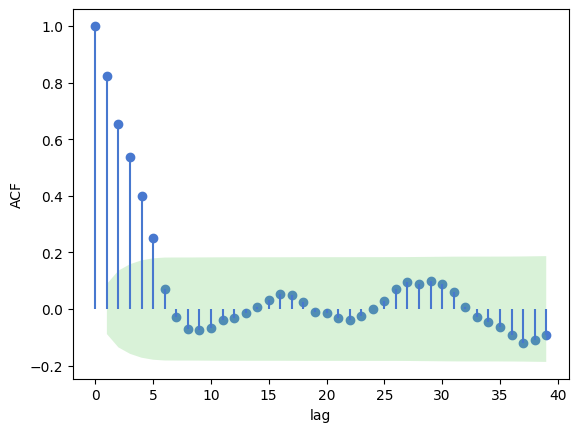

In [ ]:
plot_acf(X_MA[-1])

## Autoregressive Model (AR)

In [ ]:
def AR(epsilon, phi, drift=0):
  phi = list(phi)
  N = len(epsilon)

  phi0 = np.array([1] + phi)
  phi0 = phi[::-1] # invert the order
  p = len(phi0)

  X = epsilon.copy()
  for i in range(p, N):
    X[i-1] = np.dot(X[i-p:i], phi0) + drift
  return np.array(X)

In [ ]:
N = 500
phis = []
X_AR = []
p_max = 8
epsilon = np.random.normal(size=N)

for p in range(1, p_max+1, 2):
  phis.append(np.random.random(p)-0.5)
  X_AR.append(AR(epsilon, phis[-1]))

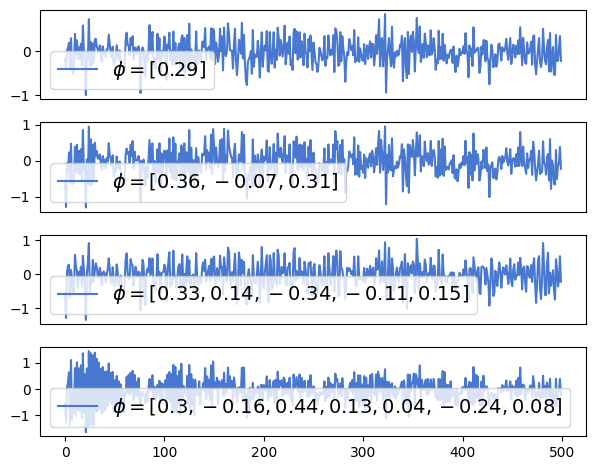

In [ ]:
fig, axs = plt.subplots(4, 1)
for i in range(p_max//2):
  axs[i].plot(X_AR[i])
  axs[i].legend([r'$\phi=\left[%s\right]$' % ", ".join(phis[i].round(2).astype('str'))], prop={'size': 14})
  axs[i].get_xaxis().set_visible(False)

axs[-1].get_xaxis().set_visible(True)
fig.tight_layout()

Partial Autocorrelation

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

import scipy
from scipy import stats

In [ ]:
def pearson(x,y):
  meanx = x.mean()
  meany = y.mean()
  stdx = x.std()
  stdy = y.std()
  return np.mean((x-meanx)*(y-meany)) / (stdx*stdy)

def rolling(x, order): # order ir the window size. Ex for order 3, it will generate windows of size 3
  'Rolling window'
  npoints = x.shape[0] # 1000
  running = []
  for i in range(npoints - order):
    running.append(x[i : i+order]) #0-3, 1-4, 2-5, ..., 998-1001
  return np.array(running)

def acf(x, lag=40):
  return np.array([1] + [pearson(x[:-i], x[i:]) for i in range(1, lag)])

def plot_acf(x, lag=40, alpha=0.05):
  acf_val = acf(x, lag)

  plt.vlines(range(lag), 0, acf_val)
  plt.scatter(np.arange(lag), acf_val, marker='o')
  plt.xlabel('lag')
  plt.ylabel('ACF')

  # Confidence Interval
  ci = acf_ci(acf_val, len(x), alpha)
  plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

# add a confidence interval for the acf
def acf_ci(acfv, n, alpha=0.05):
  se = [1 / np.sqrt(n)] # This line initializes the standard error for lag 0, assuming the variance of the time series is 1. This is a common assumption when normalizing the ACF.
  se.extend(np.sqrt((1 + 2*np.cumsum(np.power(acfv[1:-1], 2)))/n))
  se = np.array(se)
  se *= stats.norm.ppf(1-alpha/2.)
  return se

def pacf(x, lag=0):
  y = []
  for i in range(3, lag + 2):
    windows = rolling(x.flatten(), i)
    xt =  windows[:, -1] # current values are at the end (takes the last column of the array)
    xt_l = windows[:, 0] # lagged values are at zero (takes the first column of the array)
    inter =  windows[:, 1: -1] # intermediate values are between 1 and -1 (takes the intermediate columns of the array)

    lm = LinearRegression(fit_intercept=False).fit(inter, xt)
    xt_fit = lm.predict(inter)

    lm = LinearRegression(fit_intercept=False).fit(inter, xt_l)
    xt_l_fit = lm.predict(inter)

    y.append(pearson(xt - xt_fit, xt_l - xt_l_fit))
  pacf_l = acf(x, 2)[1]
  return np.array([1, pacf_l] + y)

def plot_pacf(x, alpha=0.05, lag=40):
  pacf_val = pacf(x, lag)
  plt.vlines(np.arange(lag + 1), 0, pacf_val)
  plt.scatter(np.arange(lag + 1), pacf_val, marker='o')
  plt.xlabel('lag')
  plt.ylabel('PACF')

  #confidence interval
  ci = acf_ci(pacf_val, len(x))
  plt.fill_between(np.arange(1, ci.shape[0] + 1), -ci, ci, alpha=0.25)

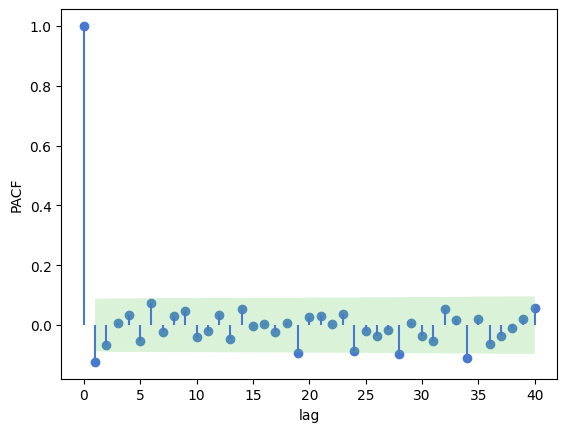

In [ ]:
plot_pacf(X_AR[0]) # the number of significant values should be the number of lags

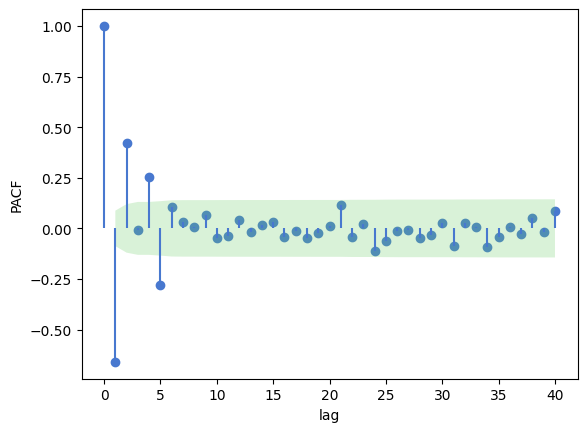

In [ ]:
plot_pacf(X_AR[-1])

## Statsmodel

### Liner Regression

In [ ]:
import seaborn as sns
import statsmodels.api as sm


anscombe = sns.load_dataset('anscombe')
anscombe.head()

dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

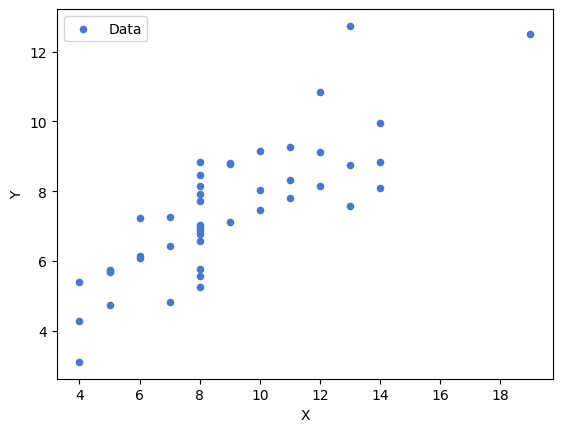

In [ ]:
ax = anscombe.plot.scatter(x='x', y='y')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(['Data'], loc='upper left')

In [ ]:
# add an intercept
anscombe['const'] = 1

# fit the linear model
model = sm.OLS(anscombe.y, anscombe[['const', 'x']]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     83.92
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           1.44e-11
Time:                        22:36:13   Log-Likelihood:                -67.358
No. Observations:                  44   AIC:                             138.7
Df Residuals:                      42   BIC:                             142.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0013      0.521      5.765      0.000       1.951       4.052
x              0.4999      0.055      9.161      0.000       0.390       0.610
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   2.327
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                0.896
Skew:                           0.339   Prob(JB):                        0.639
Kurtosis:                       3.167   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

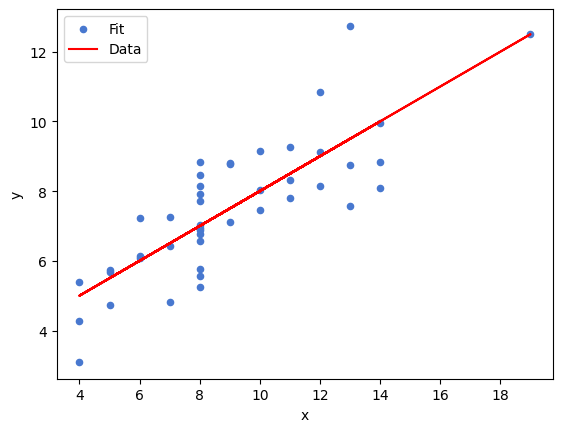

In [ ]:
ax = anscombe.plot.scatter(x='x', y='y')
ax.plot(anscombe.x, model.predict(anscombe[['const', 'x']]), color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(['Fit', 'Data'], loc='upper left')

### ARIMA Model

In [ ]:
ILI = cdc_df
ILI['Date'] = ILI[['Year', 'Week']].apply(lambda x: '%s-%02u-1' % (x.Year, x.Week), axis=1)
ILI['Date'] = pd.to_datetime(ILI['Date'], format='%Y-%U-%w')
ILI = ILI[['Date', 'Percent of Deaths Due to Pneumonia and Influenza']].set_index('Date')
ILI.head()

Percent of Deaths Due to Pneumonia and Influenza
Date                                                        
2012-01-02                                          8.479120
2012-01-09                                          8.343472
2012-01-16                                          8.370908
2012-01-23                                          8.448458
2012-01-30                                          8.140332

Text(0, 0.5, 'Percent of Deaths Due to Pneumonia and Influenza (%)')

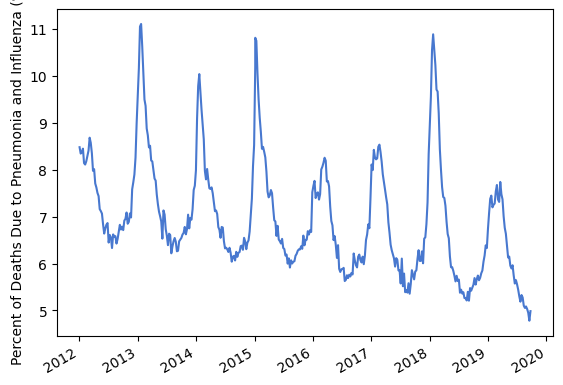

In [ ]:
ax = ILI.plot(legend=None)
ax.set_xlabel(None)
ax.set_ylabel('Percent of Deaths Due to Pneumonia and Influenza (%)')

#### Dicker-Fuller Test

Performs the Augmented Dickey-Fuller (ADF) test. The ADF test is a statistical test used to determine whether a given time series is stationary or has a unit root, which implies non-stationarity.
A low p-value (typically < 0.05) indicates that you can reject the null hypothesis (i.e., the time series is stationary).

In [ ]:
# check if the time series is stationary
adf, pvalue, critical, results = sm.tsa.stattools.adfuller(ILI, regresults=True)
pvalue # not stationary

0.00016034951684142158

#### Autocorrelation

It is possible to note a strong seasonal component

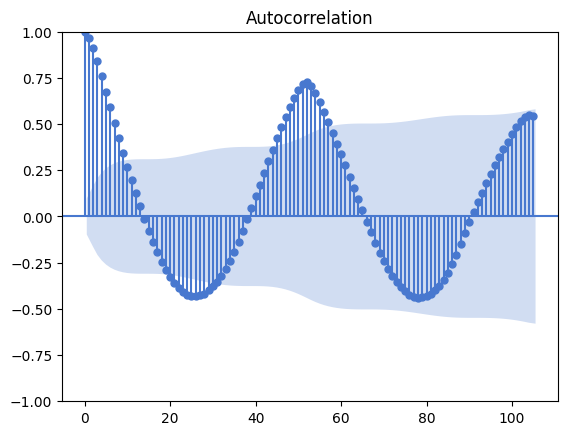

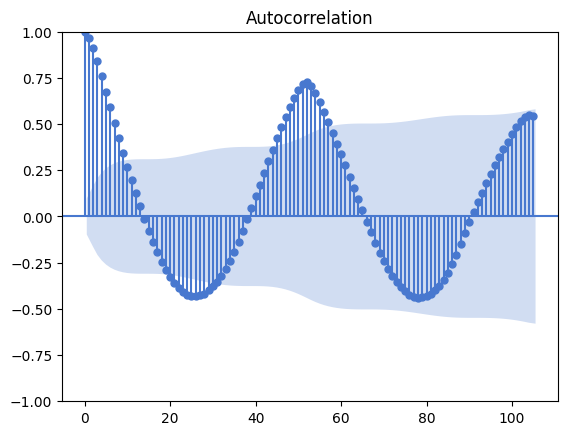

In [ ]:
sm.graphics.tsa.plot_acf(ILI, lags=105)

The series is not stationary. The oscilating pattern of the ACF is a clue of a seasonal behaviour every 52 weeks. To make it stationary, we will differentiate

In [ ]:
ILI_diff = ILI.diff(1).dropna()[:'2018']
ILI_diff.tail()

Percent of Deaths Due to Pneumonia and Influenza
Date                                                        
2018-12-03                                          0.187939
2018-12-10                                          0.132627
2018-12-17                                          0.216503
2018-12-24                                         -0.058391
2018-12-31                                          0.408337

Text(0, 0.5, 'Wow change')

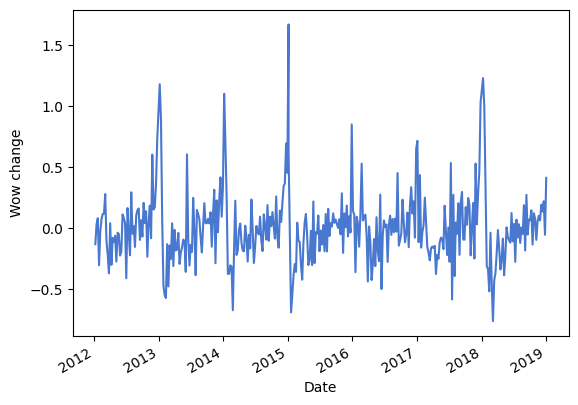

In [ ]:
ax = ILI_diff.plot(legend=None)
ax.set_ylabel('Wow change')

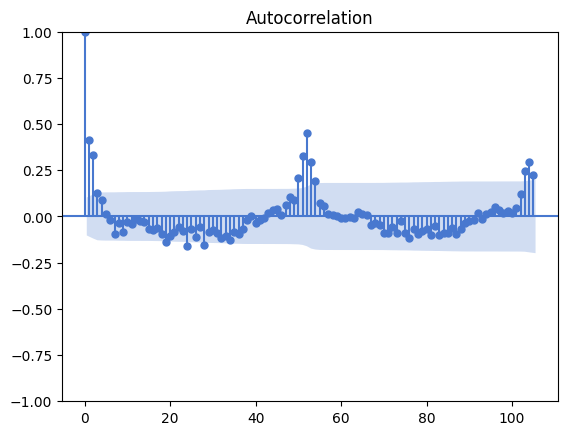

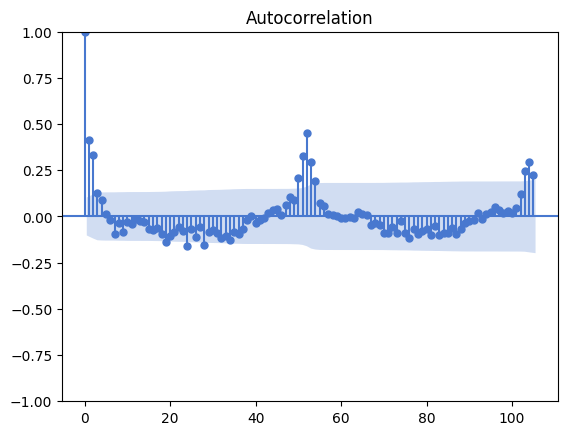

In [ ]:
sm.graphics.tsa.plot_acf(ILI_diff, lags=105)

The results are better but we dont remove all seasonality...

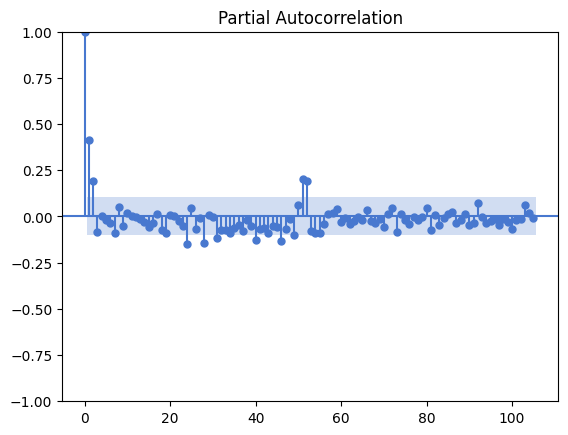

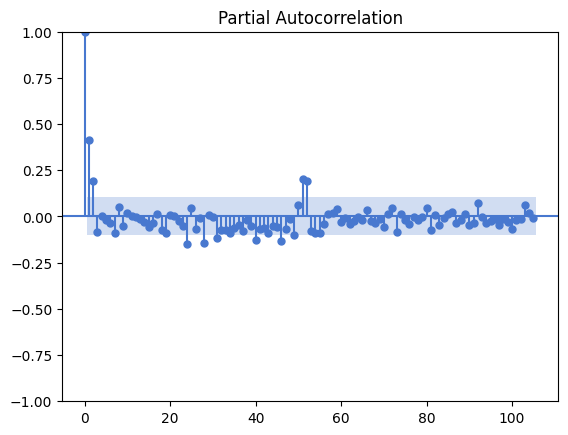

In [ ]:
sm.graphics.tsa.plot_pacf(ILI_diff, lags=105)

#### ARIMA

In [ ]:
# sm.tsa.ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none', validate_specification=True)
model = sm.tsa.ARIMA(ILI[:'2018'], order=(2, 1, 2)) #(p, d, q) order of the model
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                              SARIMAX Results                                               
============================================================================================================
Dep. Variable:     Percent of Deaths Due to Pneumonia and Influenza   No. Observations:                  365
Model:                                               ARIMA(2, 1, 2)   Log Likelihood                 -25.028
Date:                                              Sun, 23 Jun 2024   AIC                             60.055
Time:                                                      23:33:51   BIC                             79.541
Sample:                                                           0   HQIC                            67.800
                                                              - 365                                         
Covariance Type:                                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0477      0.253      0.188      0.850      -0.448       0.543
ar.L2          0.2719      0.196      1.386      0.166      -0.112       0.656
ma.L1          0.3047      0.255      1.197      0.231      -0.194       0.804
ma.L2          0.0536      0.132      0.405      0.686      -0.206       0.313
sigma2         0.0671      0.003     19.877      0.000       0.061       0.074
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               188.71
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.81
Prob(H) (two-sided):                  0.79   Kurtosis:                         6.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
results

Compare the predict values with the original ones

(4.7816352266, 21.105665224)

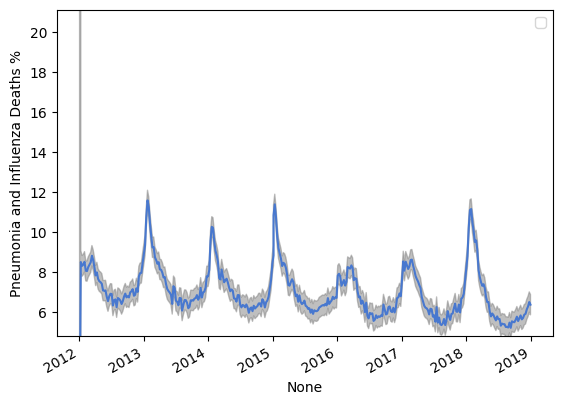

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(1,1)
plot_predict(results, ax=ax)
plt.legend('original', model)
ax.set_xlabel('None')
ax.set_ylabel('Pneumonia and Influenza Deaths %')
ax.set_ylim([ILI.min()[0] , ILI.max()[0] + 10])

A problem arises when we try to predict the future values because the trend was ignored.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(4.0, 12.0)

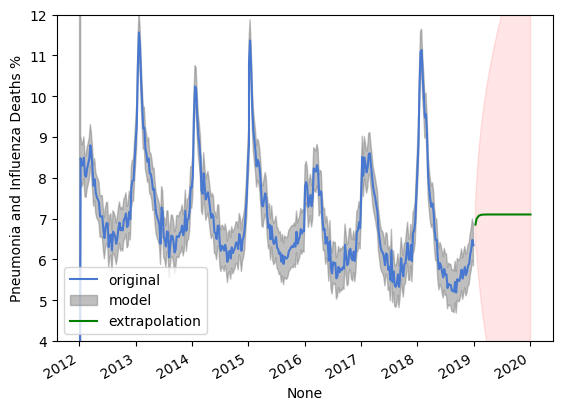

In [ ]:
fig, ax = plt.subplots(1, 1)
plot_predict(results, ax=ax)

forecast = results.get_forecast(steps=52) # steps to forecast
forecast_index = pd.date_range(start='2019', periods=52 + 1, freq='W')[1:] # time range
forecast_mean = forecast.predicted_mean # predicted values
forecast_ci = forecast.conf_int() # confidence interval
# Access lower and upper bounds of confidence intervals
lower_ci = forecast.conf_int().iloc[:, 0]
upper_ci = forecast.conf_int().iloc[:, 1]
ax.plot(forecast_index, forecast_mean, label='Forecast', color='green')
ax.fill_between(forecast_index, lower_ci, upper_ci, color='red', alpha=0.1)

plt.legend(['original', 'model', 'extrapolation'])
ax.set_xlabel('None')
ax.set_ylabel('Pneumonia and Influenza Deaths %')
ax.set_ylim([4 , 12])

#### SARIMA

diff(52) computes the difference between an element and the element that is 52 positions behind it. This operation is useful for removing seasonality in the data. By differencing with a lag of 52 (assuming the data is weekly and the seasonal period is yearly), you aim to remove the yearly seasonality.

diff(1) computes the first-order difference of the series resulting from the .diff(52) operation. The first-order difference is simply the difference between consecutive elements. This step helps in making the series stationary by removing any remaining trend.

Text(0.5, 0, 'None')

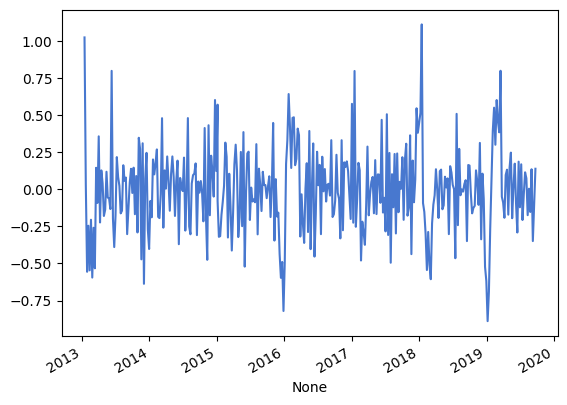

In [ ]:
seasonal_ILI = ILI.diff(52).diff(1).dropna().copy()

ax = seasonal_ILI.plot(legend=None)
ax.set_xlabel('None')

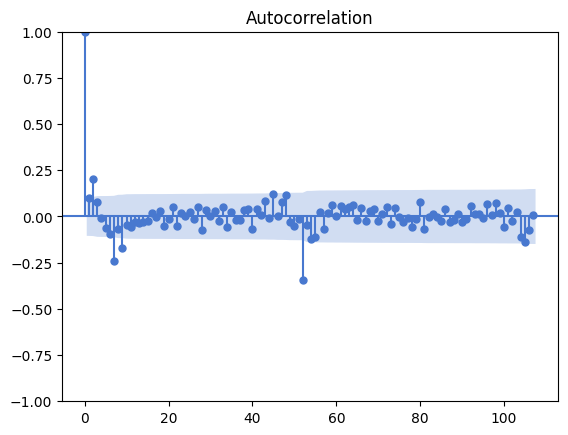

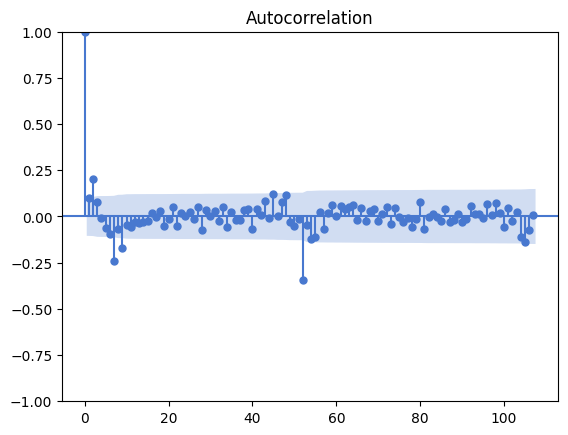

In [ ]:
sm.graphics.tsa.plot_acf(seasonal_ILI, lags=107)

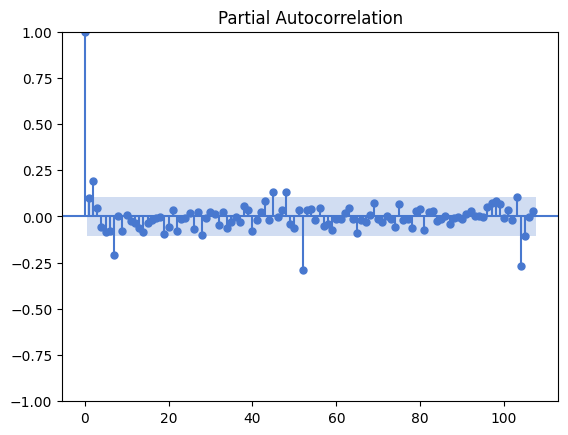

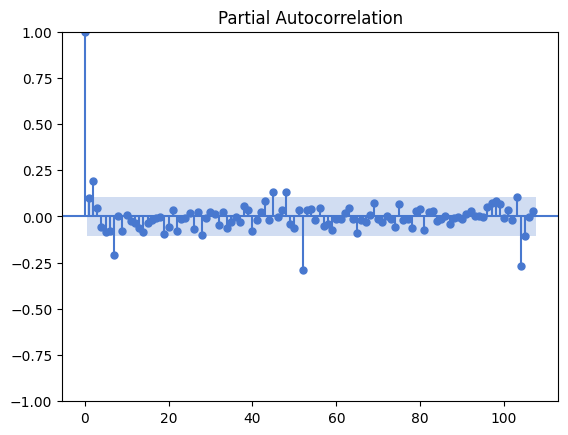

In [ ]:
sm.graphics.tsa.plot_pacf(seasonal_ILI, lags=107)

In [ ]:
mod = sm.tsa.statespace.SARIMAX(ILI.values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 1, 1, 52),
                                simple_differencing=False)
res = mod.fit()

In [ ]:
ILI.shape

(403, 1)

In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  403
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 52)   Log Likelihood                   3.377
Date:                              Mon, 24 Jun 2024   AIC                              7.246
Time:                                      00:40:24   BIC                             34.252
Sample:                                           0   HQIC                            17.996
                                              - 403                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4387      0.141     10.200      0.000       1.162       1.715
ar.L2         -0.7703      0.119     -6.456      0.000      -1.004      -0.536
ma.L1         -1.3422      0.139     -9.631      0.000      -1.615      -1.069
ma.L2          0.7654      0.108      7.056      0.000       0.553       0.978
ar.S.L52       0.1714      0.094      1.825      0.068      -0.013       0.355
ma.S.L52      -0.9963      6.371     -0.156      0.876     -13.483      11.491
sigma2         0.0444      0.280      0.159      0.874      -0.504       0.593
===================================================================================
Ljung-Box (L1) (Q):                   0.97   Jarque-Bera (JB):                38.31
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.47
Prob(H) (two-sided):                  0.61   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

(4.0, 12.0)

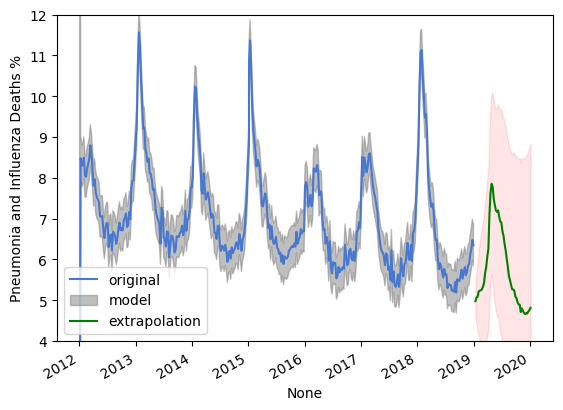

In [ ]:
fig, ax = plt.subplots(1, 1)
plot_predict(results, ax=ax)

forecast = res.get_forecast(steps=52) # steps to forecast
forecast_index = pd.date_range(start='2019', periods=52 + 1, freq='W')[1:] # time range
forecast_mean = forecast.predicted_mean # predicted values
forecast_ci = forecast.conf_int() # confidence interval
lower_ci = forecast_ci[:, 0]
upper_ci = forecast_ci[:, 1]
ax.plot(forecast_index, forecast_mean, label='Forecast', color='green')
ax.fill_between(forecast_index, lower_ci, upper_ci, color='red', alpha=0.1)

plt.legend(['original', 'model', 'extrapolation'])
ax.set_xlabel('None')
ax.set_ylabel('Pneumonia and Influenza Deaths %')
ax.set_ylim([4 , 12])

# Chapter 9 - ARCH Models

ARCH models help us predict future volatility by considering past volatility. The name breaks down as:

- Autoregressive: We're using past data to predict current data.
- Conditional: The predictions depend on past observations.
- Heteroskedasticity: The variance (volatility) is not constant; it changes over time

In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 9.9 MB/s eta 0:00:00


In [ ]:
import arch
from arch import arch_model

import statsmodels.api as sm

In [ ]:
def time_series_plot(y, title=None):
  fig, axs_lst = plt.subplots(3, 1)
  if title is not None:
    axs_lst[0].set_title(title)

  y.plot(ax=axs_lst[0])
  sm.tsa.graphics.plot_acf(y, ax=axs_lst[1], alpha=0.5)
  sm.tsa.graphics.plot_pacf(y, ax=axs_lst[2], alpha=0.5)
  plt.tight_layout()

In [ ]:
def ARCH(a0, a1):
  '''
  a0 (constant): This is the intercept term in the model and represents the baseline level of volatility that is independent of past squared residuals.
  It ensures that the conditional variance is always positive and serves as the floor level of volatility.
  a1 (Lagged Squared Residual Coefficient): a parameter showing how much yesterday's squared residual affects today's volatility. It measures the impact of past squared residuals (shocks) on the current conditional variance.
  A higher a1 means that past shocks have a greater influence on current volatility.
  The variance at time t (var_t²) is a0 + a1*Et-1², where Et-1 is the squared residual (error term) from the previous period.
  Residuals are the differences between actual returns and their average value.
  By squaring the residuals, we get rid of negative values and focus on the size of the "unexpected" returns, not their direction.
  '''
  y = w = np.random.normal(size=1000)
  Y = np.empty_like(y)
  for t in range(len(y)):
    Y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))
  return pd.Series(Y)

In [ ]:
Y = ARCH(2, 0.5)
Y[:10]

0   -1.217108
1    1.434356
2   -0.672832
3   -1.922947
4   -2.854330
5   -1.204862
6   -1.358080
7    0.162396
8    0.482068
9   -0.522349
dtype: float64

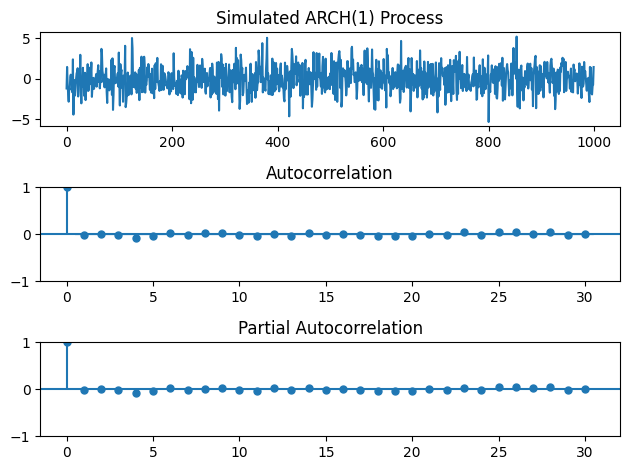

In [ ]:
time_series_plot(Y, title='Simulated ARCH(1) Process') # Note that ACF and PACF seems white noise...

The key feature captured by ARCH models is the volatility clustering, which becomes evident when analyzing the squared returns. The squared returns highlight the periods of increased or decreased volatility, showing significant autocorrelation patterns

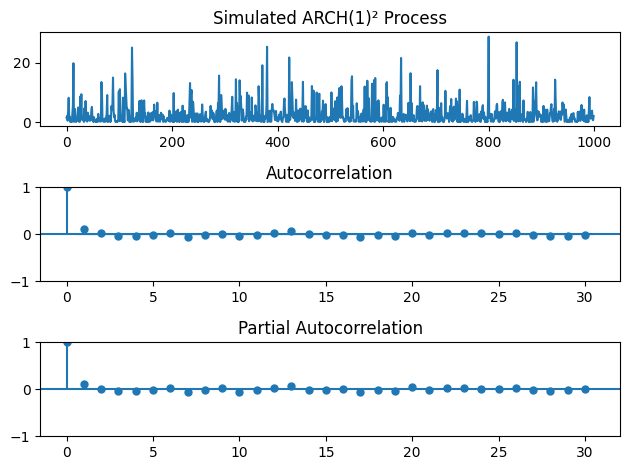

In [ ]:
time_series_plot(Y**2, title='Simulated ARCH(1)² Process') # With squared values some lags appear to be significant...

## GARCH(1,1) Model

GARCH (Generalized Autoregressive Conditional Heteroskedasticity) Model

The GARCH model is an extension of the ARCH model. While ARCH models the current period's volatility based solely on past squared residuals, the GARCH model adds an additional layer by also incorporating past conditional variances. This allows the model to capture more complex volatility patterns.

GARCH models provide a smoother volatility process by combining past squared residuals and past variances.



In [ ]:
def GARCH(a0, a1, b1):
  '''
  Conditional Variance Equation (var_t²) = a0 + a1*Et-1² + B1*var_t-1²
 - a0: constant term, representing the long-term average variance.
 - a1: Coefficient of the lagged squared residual (Et-1²). Represents the impact of the past on current volatility.
       The residuals are the differences between actual returns and the mean return.
       The mean return is just a simple mean calculated with the sum of (current return - yesterday return)/yesterday return for each day, divided by the number of days.
       The residual (Et) for a specific day is the return of that day - mean of returns.
  - B1: Coefficient of the lagged conditional variance (var_t-1²). Represents the persistence of past volatility
       These parameters are usually estimated with MLE (Maximum Likehood Estimation)
  '''
  n = 10000
  w = np.random.normal(size=n)
  eps = np.zeros_like(w)
  sigsq = np.zeros_like(w)

  for i in range(1, n):
    sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1] # autoregressive moving average model
    eps[i] = w[i] * np.sqrt(sigsq[i])

  return pd.Series(eps)

In [ ]:
eps = GARCH(0.2, 0.5, 0.3)

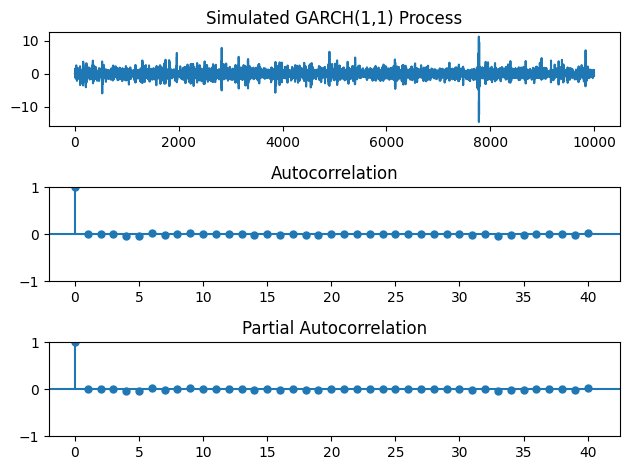

In [ ]:
time_series_plot(eps, title='Simulated GARCH(1,1) Process')

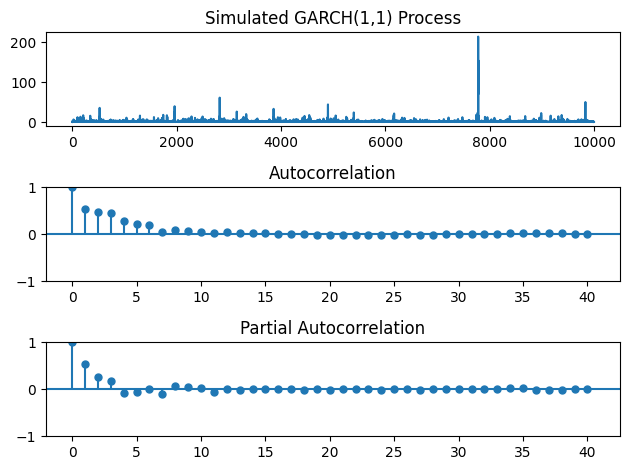

In [ ]:
time_series_plot(eps**2, title='Simulated GARCH(1,1) Process') # squared returns more significant lags.
# this means that is necessary to use a model selection to help to select the best parameters.

Exemple using Down Jones data

<Axes: xlabel='DATE'>

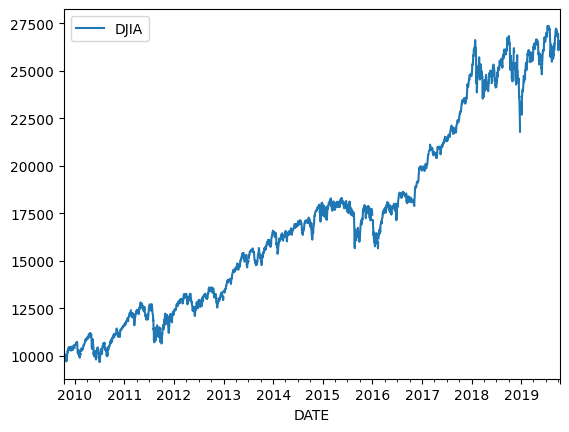

In [ ]:
dj_df.plot()

Text(0, 0.5, 'DoD Return (%)')

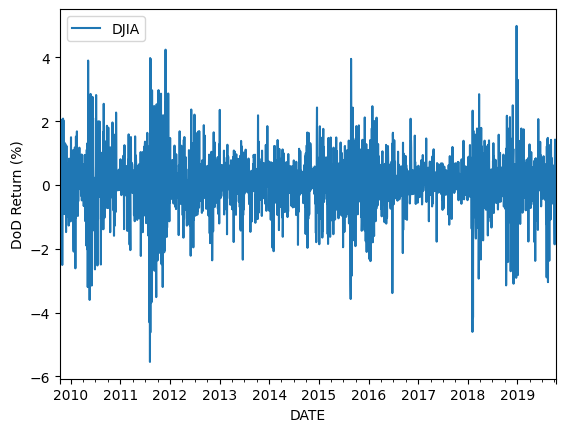

In [ ]:
returns =  100 * dj_df.pct_change().dropna()
ax = returns.plot()
ax.set_ylabel('DoD Return (%)')

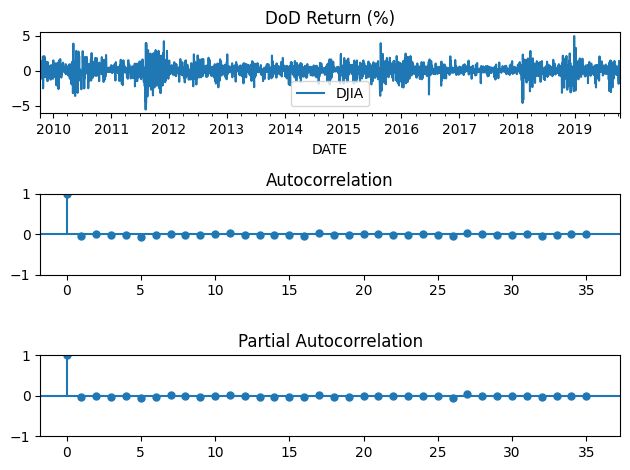

In [ ]:
time_series_plot(returns, title='DoD Return (%)') # not squared

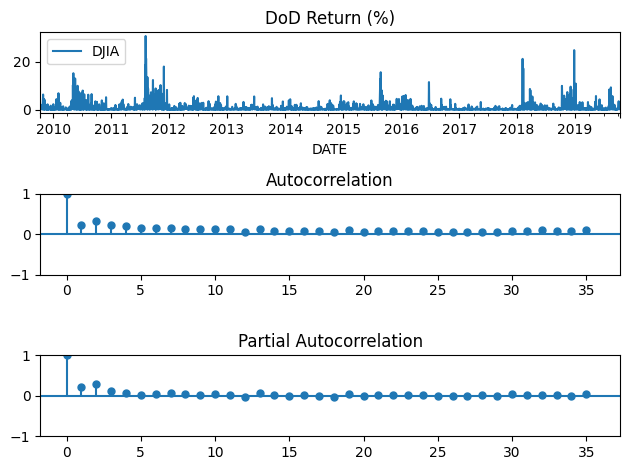

In [ ]:
time_series_plot(returns**2, title='DoD Return (%)') # squared returns many significant lags

Let's train a GARCH model

In [ ]:
model = arch_model(returns, p=1, o=0, q=1)
model

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x7eb51fcf59c0

In [ ]:
results = model.fit()
results

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18470.573535942254
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11663561028.36399
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4096.988666834002
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4413.531020542108
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3008.564006295113
Iteration:      6,   Func. Count:     44,   Neg. LLF: 3001.3302366887474
Iteration:      7,   Func. Count:     49,   Neg. LLF: 3000.9345792349345
Iteration:      8,   Func. Count:     54,   Neg. LLF: 3000.923636194031
Iteration:      9,   Func. Count:     59,   Neg. LLF: 3000.9226292583344
Iteration:     10,   Func. Count:     64,   Neg. LLF: 3000.9225225920636
Iteration:     11,   Func. Count:     69,   Neg. LLF: 3000.922518677434
Iteration:     12,   Func. Count:     73,   Neg. LLF: 3000.9225186774597
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3000.922518677434
            Iterations

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   DJIA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3000.92
Distribution:                  Normal   AIC:                           6009.85
Method:            Maximum Likelihood   BIC:                           6033.31
                                        No. Observations:                 2608
Date:                Wed, Jun 26 2024   Df Residuals:                     2607
Time:                        00:59:47   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0744  1.327e-02      5.608  2.043e-08 [4.840e-0

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   DJIA   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3000.92
Distribution:                  Normal   AIC:                           6009.85
Method:            Maximum Likelihood   BIC:                           6033.31
                                        No. Observations:                 2608
Date:                Wed, Jun 26 2024   Df Residuals:                     2607
Time:                        00:59:47   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0744  1.327e-02      5.608  2.043e-08 [4.840e-02,  0.100]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0318  6.646e-03      4.780  1.749e-06 [1.875e-02,4.480e-02]
alpha[1]       0.1587  2.316e-02      6.851  7.310e-12     [  0.113,  0.204]
beta[1]        0.8033  2.280e-02     35.232 6.528e-272     [  0.759,  0.848]
============================================================================

Covariance estimator: robust
"""

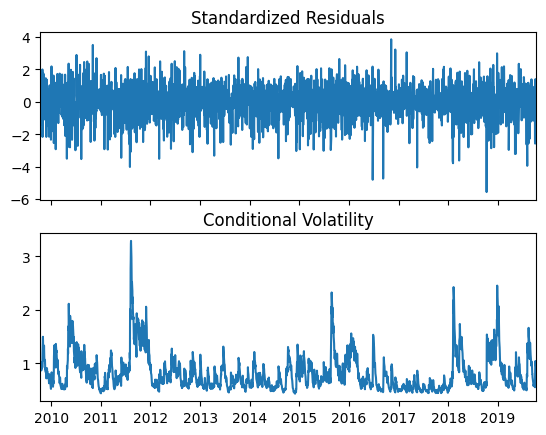

In [ ]:
ax = results.plot()

Lets simulate values

In [ ]:
simulated = model.simulate(params=results.params, nobs=2608)['data']
simulated.index = returns.index

Text(0, 0.5, 'DoD Returns (%)')

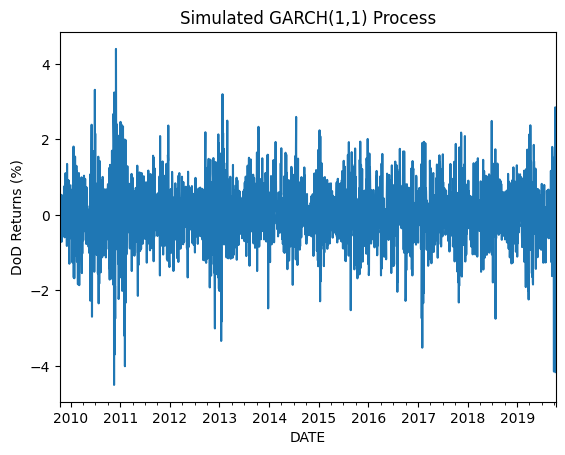

In [ ]:
ax = simulated.plot()
ax.set_title('Simulated GARCH(1,1) Process')
ax.set_ylabel('DoD Returns (%)')

# Chapter 10 - Machine Learning in Time Series

## Interpolation

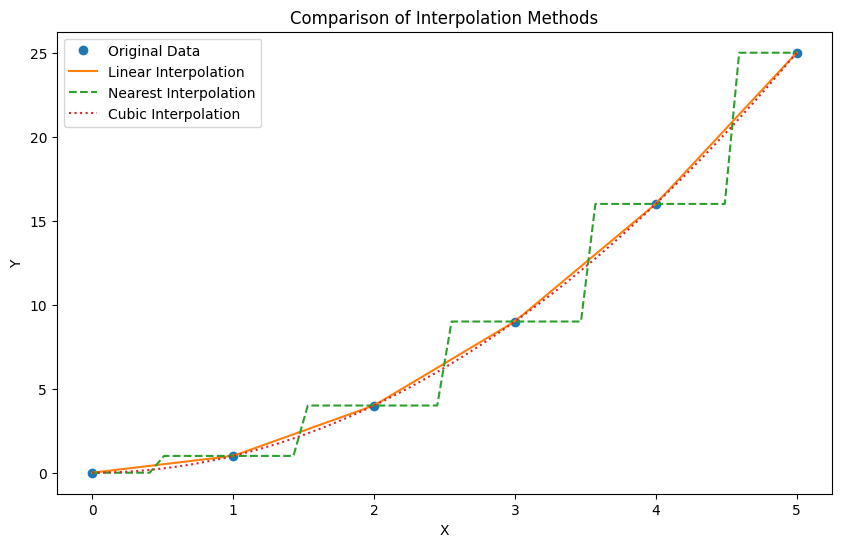

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Define the data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

# Create interpolation functions
f_linear = interp1d(x, y, kind='linear')
f_nearest = interp1d(x, y, kind='nearest')
f_cubic = interp1d(x, y, kind='cubic')

# Generate new x values for interpolation
x_new = np.linspace(0, 5, 50)

# Interpolated values
y_linear = f_linear(x_new)
y_nearest = f_nearest(x_new)
y_cubic = f_cubic(x_new)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x_new, y_linear, '-', label='Linear Interpolation')
plt.plot(x_new, y_nearest, '--', label='Nearest Interpolation')
plt.plot(x_new, y_cubic, ':', label='Cubic Interpolation')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Comparison of Interpolation Methods')
plt.show()


## Resample

Pandas resample() method is used to resample time series data. This is particularly useful when you need to change the frequency of your time series data, such as converting daily data to monthly data, or vice versa.

- Change Frequency: Convert data to different time frequencies (e.g., daily to weekly, monthly to yearly).

- Aggregation: Apply aggregation functions (e.g., mean, sum) to the resampled data.

- Downsampling and Upsampling: Downsampling reduces the frequency (e.g., daily to monthly), while upsampling increases it (e.g., monthly to daily).

In [ ]:
import pandas as pd
import numpy as np

# Create a time series
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['data'] = np.random.randint(0, 100, size=(len(date_rng)))

# Set the date column as the index
df.set_index('date', inplace=True)

# Downsample to monthly level and aggregate by sum
df_monthly = df.resample('M').sum()

print(df)
print(df_monthly)

            data
date            
2023-01-01    99
2023-01-02    67
2023-01-03    46
2023-01-04    99
2023-01-05    42
2023-01-06    96
2023-01-07    37
2023-01-08    16
2023-01-09    48
2023-01-10    63
            data
date            
2023-01-31   613


## GDP dataset example

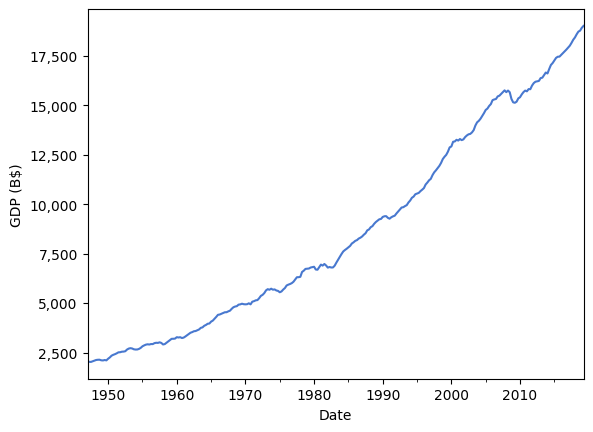

In [8]:
ax = gdp_df.plot(legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('GDP (B$)')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

The values at time t+1 are very strongly correlated with the points at t

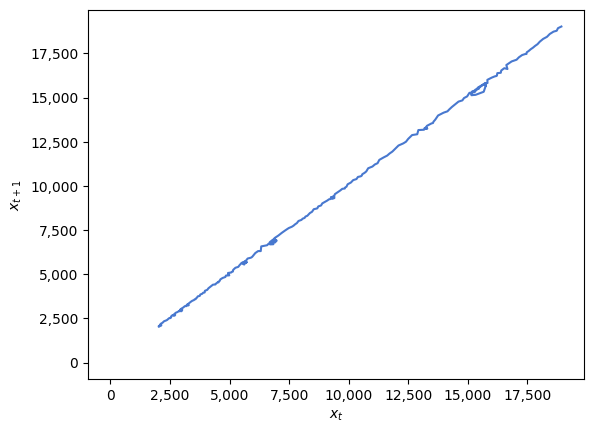

In [18]:
fig, ax = plt.subplots(1)
ax.plot(gdp_df.iloc[:-1], gdp_df.iloc[1:])
ax.set_xlabel(r'$x_{t}$')
ax.set_ylabel(r'$x_{t+1}$')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
);
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
);

In [20]:
import sklearn
from sklearn.linear_model import LinearRegression

import scipy
from scipy import stats

Trying to git xt+1 = f(xt) performing a Linear Regression

Text(0, 0.5, '$x_{t+1}$')

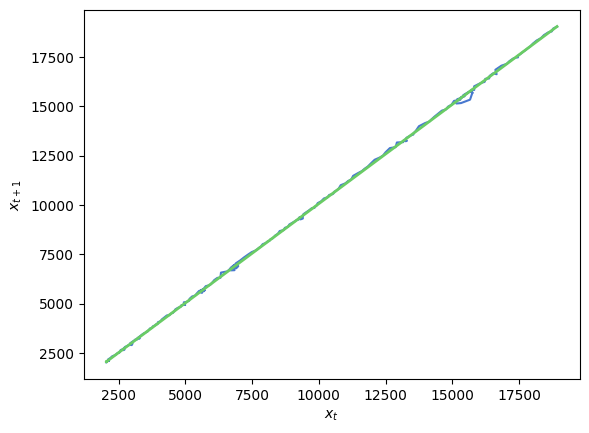

In [33]:
values = gdp_df.dropna().values
X = values[:-1].reshape(-1, 1)
y = values[1:].reshape(-1, 1)

lm = LinearRegression()
lm.fit(X, y)

y_pred = lm.predict(X)

fig, ax = plt.subplots(1)
ax.plot(gdp_df.iloc[:-1], gdp_df.iloc[1:])
ax.plot(gdp_df.iloc[:-1], y_pred, lw=2)
ax.set_xlabel(r'$x_{t}$')
ax.set_ylabel(r'$x_{t+1}$')

In [29]:
gdp_df.index[1:]

DatetimeIndex(['1947-04-01', '1947-07-01', '1947-10-01', '1948-01-01',
               '1948-04-01', '1948-07-01', '1948-10-01', '1949-01-01',
               '1949-04-01', '1949-07-01',
               ...
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01', '2018-07-01', '2018-10-01',
               '2019-01-01', '2019-04-01'],
              dtype='datetime64[ns]', name='DATE', length=289, freq=None)

Now, lets compare the original ts with this fit

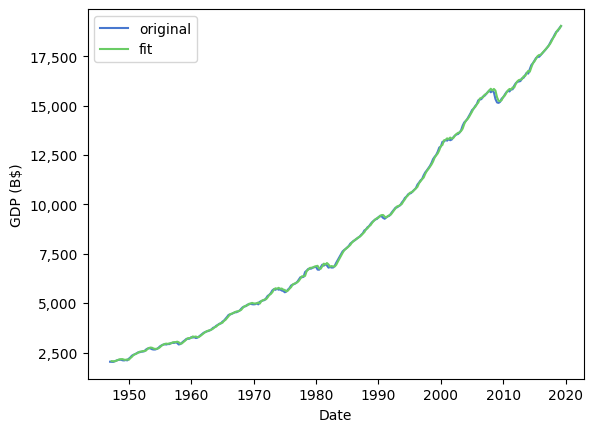

In [34]:
plt.plot(gdp_df.index, values, label='original')
plt.plot(gdp_df.index[1:], y_pred, label='fit')
plt.xlabel('Date')
plt.ylabel('GDP (B$)')
plt.legend()
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

Fit cumulative

<ipython-input-88-e053b1a4da01>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred_cumul = [float(values[0])]


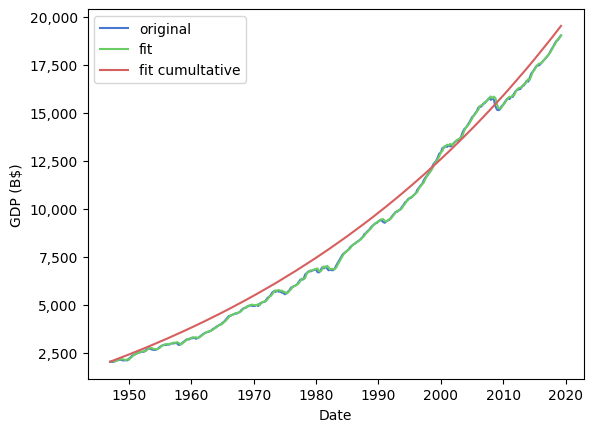

In [88]:
y_pred_cumul = [float(values[0])]
for i in range(1, len(values)):
  val = lm.intercept_+ np.squeeze(y_pred_cumul[-1])*np.squeeze(lm.coef_)
  y_pred_cumul.append(val[0])
plt.plot(gdp_df.index, values, label='original')
plt.plot(gdp_df.index[1:], y_pred, label='fit')
plt.plot(gdp_df.index, y_pred_cumul, label='fit cumultative')

plt.xlabel('Date')
plt.ylabel('GDP (B$)')
plt.legend()
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

Removing the trend

An alternative to differentiating is taking the relative change = ((yt+1)/yt)-1
that can be easily calculate with pd.pct_change()

Text(0, 0.5, 'GDP QoQ Growth')

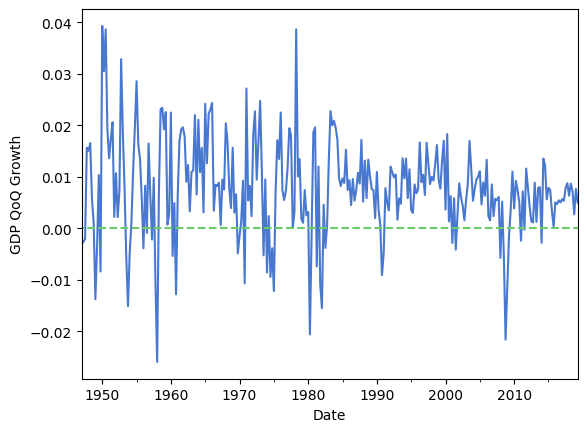

In [89]:
ax = gdp_df['GDP'].pct_change().plot()
ax.plot([gdp_df.index.min(), gdp_df.index.max()], [0,0], '--')
ax.set_xlabel('Date')
ax.set_ylabel('GDP QoQ Growth')

Autocorrelation Function with pandas

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

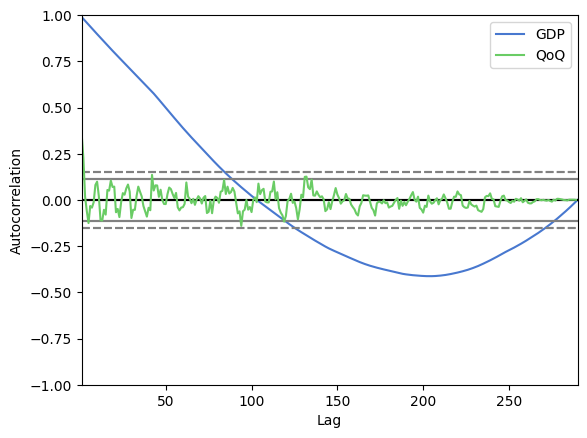

In [97]:
# is a graphical representation of the autocorrelation of a time series as a function of the lag. It is a useful tool for identifying the presence of patterns or trends in the data over different time lags.
# The x-axis represents the lag (number of periods).
# The y-axis represents the autocorrelation coefficient.
# Significant spikes outside the confidence intervals indicate significant autocorrelation at those lags.
from pandas.plotting import autocorrelation_plot

ax = autocorrelation_plot(gdp_df, label='GDP')
autocorrelation_plot(gdp_df.pct_change().dropna(), ax=ax, label='QoQ')

# the chart shows that the ts is not stationary. It has a strong trend
# however when we plot pct_change() we see that the trend is gone

Now, that the trend is removed, lets see how consecutive points look like

Text(0, 0.5, '$x_{t+1}$')

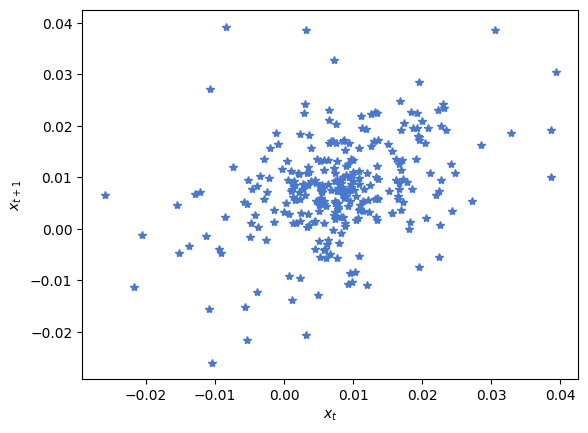

In [123]:
values = gdp_df.pct_change().dropna().values.reshape(-1, 1) #reshape the array into as many rows as needed to accommodate all the elements, and create 1 column
X = values[:-1] # not include the last
y = values[1:] # not include the first
plt.plot(X.flatten(), y, '*')
plt.xlabel(r'$x_t$')
plt.ylabel(r'$x_{t+1}$')

Performing a linear regression

In [125]:
lm = LinearRegression()
lm.fit(X, y)
y_pred = lm.predict(X)

Text(0, 0.5, '$x_{t+1}$')

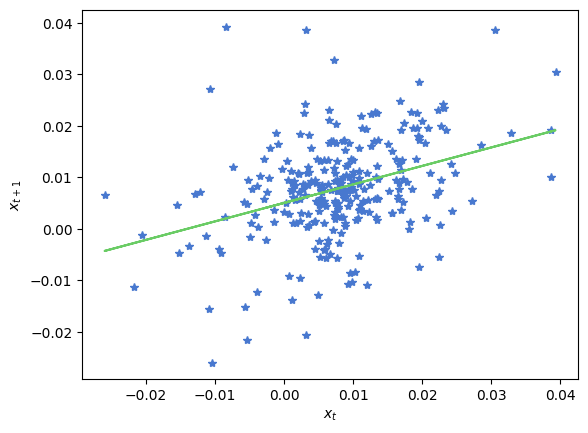

In [126]:
plt.plot(X.flatten(), y, '*')
plt.plot(X.flatten(), y_pred, '-')
plt.xlabel(r'$x_t$')
plt.ylabel(r'$x_{t+1}$')

Now we can reconstruct the original signal based on our fit.
Since we are using relative differences, we have to invert the equation above when reconstructing the ts.
The results shows that the fit was not so good...

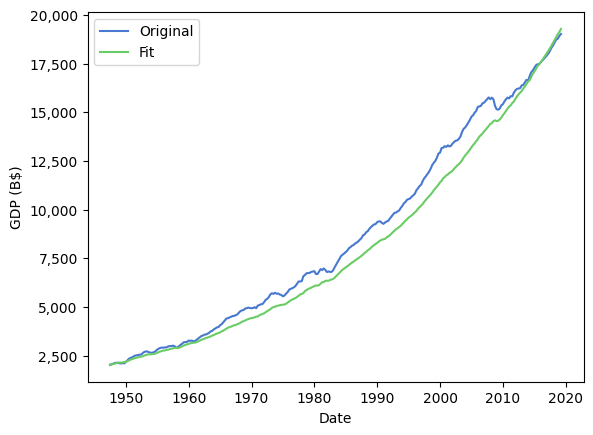

In [127]:
plt.plot(gdp_df.index[2:], gdp_df.values[2:])
# compute the cumulative product of predicted growth rates and then scale this product by an initial value.
# When dealing with growth rates or returns, the values typically represent relative changes from one period to the next.
# To aggregate these changes over multiple periods, they need to be converted into a form that can be multiplicatively compounded.
# This is done by adding 1 to each growth rate or return. For instance:
# A 10% increase followed by a 10% decrease does not result in zero; instead, it results in a net decrease of 1.1×0.9=0.99, or a 1% decrease overall.
# Adding 1 ensures that you correctly compute the cumulative product of these multiplicative factors over time.
plt.plot(gdp_df.index[2:], (1+y_pred).cumprod()*gdp_df.values[0])
plt.xlabel('Date')
plt.ylabel('GDP (B$)')
plt.legend(['Original', 'Fit'])
plt.gca().get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
);

Now, lets looking into the future

In [131]:
n_points = len(gdp_df)
train_points = int(2/3*n_points)+1

X_train = X[:train_points]
y_train = y[:train_points]
X_test = X[train_points:]
y_test = y[train_points:]

lm = LinearRegression()
lm.fit(X_train, y_train)

y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

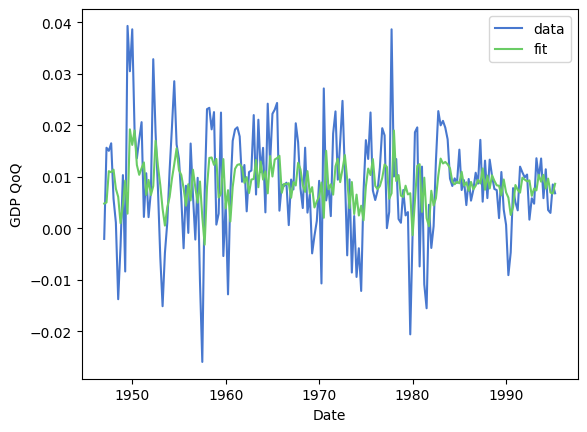

In [133]:
plt.plot(gdp_df.index[:train_points], y_train, label='data')
plt.plot(gdp_df.index[:train_points], y_train_pred, label='fit')
plt.xlabel('Date')
plt.ylabel('GDP QoQ')
plt.legend()

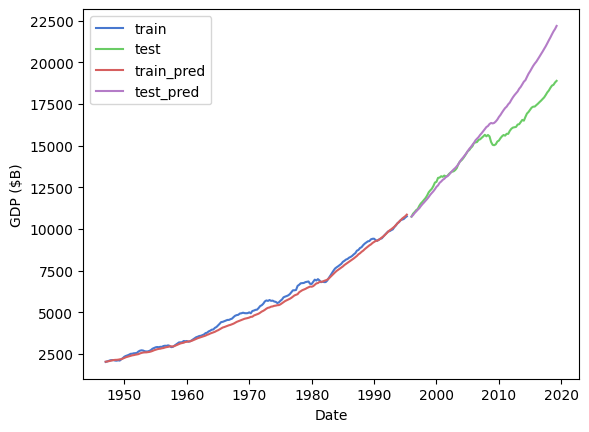

In [135]:
plt.plot(gdp_df.index[:train_points], (1+y_train).cumprod()*gdp_df.values[0], label='train')
plt.plot(gdp_df.index[train_points+2:], (1+y_test).cumprod()*gdp_df.values[train_points], label='test')
plt.plot(gdp_df.index[:train_points], (1+y_train_pred).cumprod()*gdp_df.values[0], label='train_pred')
plt.plot(gdp_df.index[train_points+2:], (1+y_test_pred).cumprod()*gdp_df.values[train_points], label='test_pred')
plt.xlabel('Date')
plt.ylabel('GDP ($B)')
plt.legend()

ARIMA Model

In [146]:
def rolling(x, order):
  npoints = x.shape[0]
  running = []
  for i in range(npoints-order):
    running.append(x[i:i+order])
  return np.array(running)

In [162]:
def build_features(x, p, q):
  '''ARIMA params:
  - p represents the number of lag observations. AR models capture the linear relationship between the time series and its lagged values.
  - d represents the degree of differencing required to stationarize the time series data.
  - q represents the number of lagged forecast errors in the moving average model component.MA models capture the relationship between the time series and the residual errors from a moving average model applied to lagged observations.
  '''
  AR_features = None
  MA_features = None

  #Determine the features and the epsilon terms for MA and fit a linear regression
  lm = LinearRegression(fit_intercept=True)
  X = rolling(np.r_[np.zeros(p), x], p)
  lm.fit(X, x)

  # MA features are the residuals
  residuals = lm.predict(X)-x
  residuals[0] = 0

  # prepend with zeros as there are no residuals_t-k in the first X_t
  MA_features = rolling(np.r_[np.zeros(q), residuals], q)

  # For the AR features, we have to use the original values
  # prepend with zeros as there are no residuals_t-k in the first X_t
  AR_features = rolling(np.r_[np.zeros(p), x], p)

  n = min(len(AR_features), len(MA_features))
  AR_features = AR_features[:n]
  MA_features = MA_features[:n]
  features = np.hstack((AR_features, MA_features))
  return features, x[:n]

Lets apply p=q=2

In [163]:
features, y = build_features(y_train.flatten(), 2, 2)

In [156]:
# The first 2 columns corresponds to the AR features and the last 2 columns to the MA features
features[:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.00206496,  0.        ,  0.        ],
       [-0.00206496,  0.01564208,  0.        , -0.01108707],
       [ 0.01564208,  0.01504256, -0.01108707, -0.00517957],
       [ 0.01504256,  0.01650658, -0.00517957, -0.00518136]])

In [164]:
arima = LinearRegression(fit_intercept=True) # the intercept represents the value of the dependent variable when all independent variables are zero.

In [165]:
arima.fit(features, y)

LinearRegression()

In [166]:
y_ =  arima.predict(features)

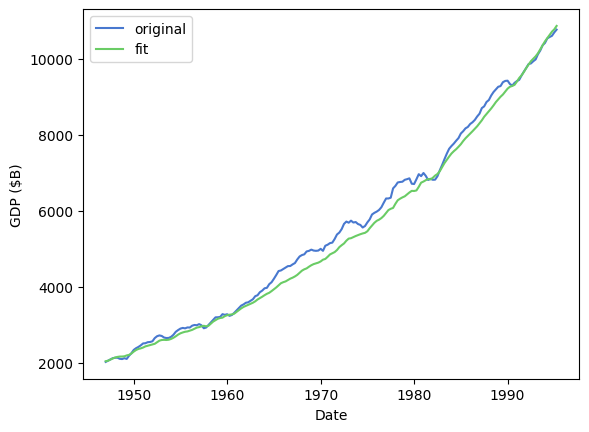

In [169]:
plt.plot(gdp_df.index[:train_points], (1+y_train).cumprod()*gdp_df.values[0], label='original')
plt.plot(gdp_df.index[:train_points], (1+y_).cumprod()*gdp_df.values[0], label='fit')
plt.xlabel('Date')
plt.ylabel('GDP ($B)')
plt.legend()

Now, with ARIMA it is fitting better

: